In [1]:
!nvidia-smi

Mon Nov  4 11:27:02 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip uninstall ultralytics -y
!pip install ultralytics --no-cache-dir --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 21.1 MB/s eta 0:00:00a 0:00:01


In [5]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [6]:
from ultralytics import YOLO
from IPython.display import display, Image

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="t4DiHJzpmpEnGCNNSHwd")
project = rf.workspace("fskd").project("expression-0qlmc")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 2.3 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to expression-1 in yolov11:: 100%|██████████| 11210/11210 [00:01<00:00, 8722.18it/s]


In [12]:
dataset.location

'/content/expression-1'

In [8]:
!yolo task=detect mode=train model='/content/yolo11m.pt' data={dataset.location}/data.yaml epochs=50 imgsz=640

100%|███████████████████████████████████████| 38.8M/38.8M [00:00<00:00, 195MB/s]
Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/yolo11m.pt, data=/kaggle/working/expression-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False

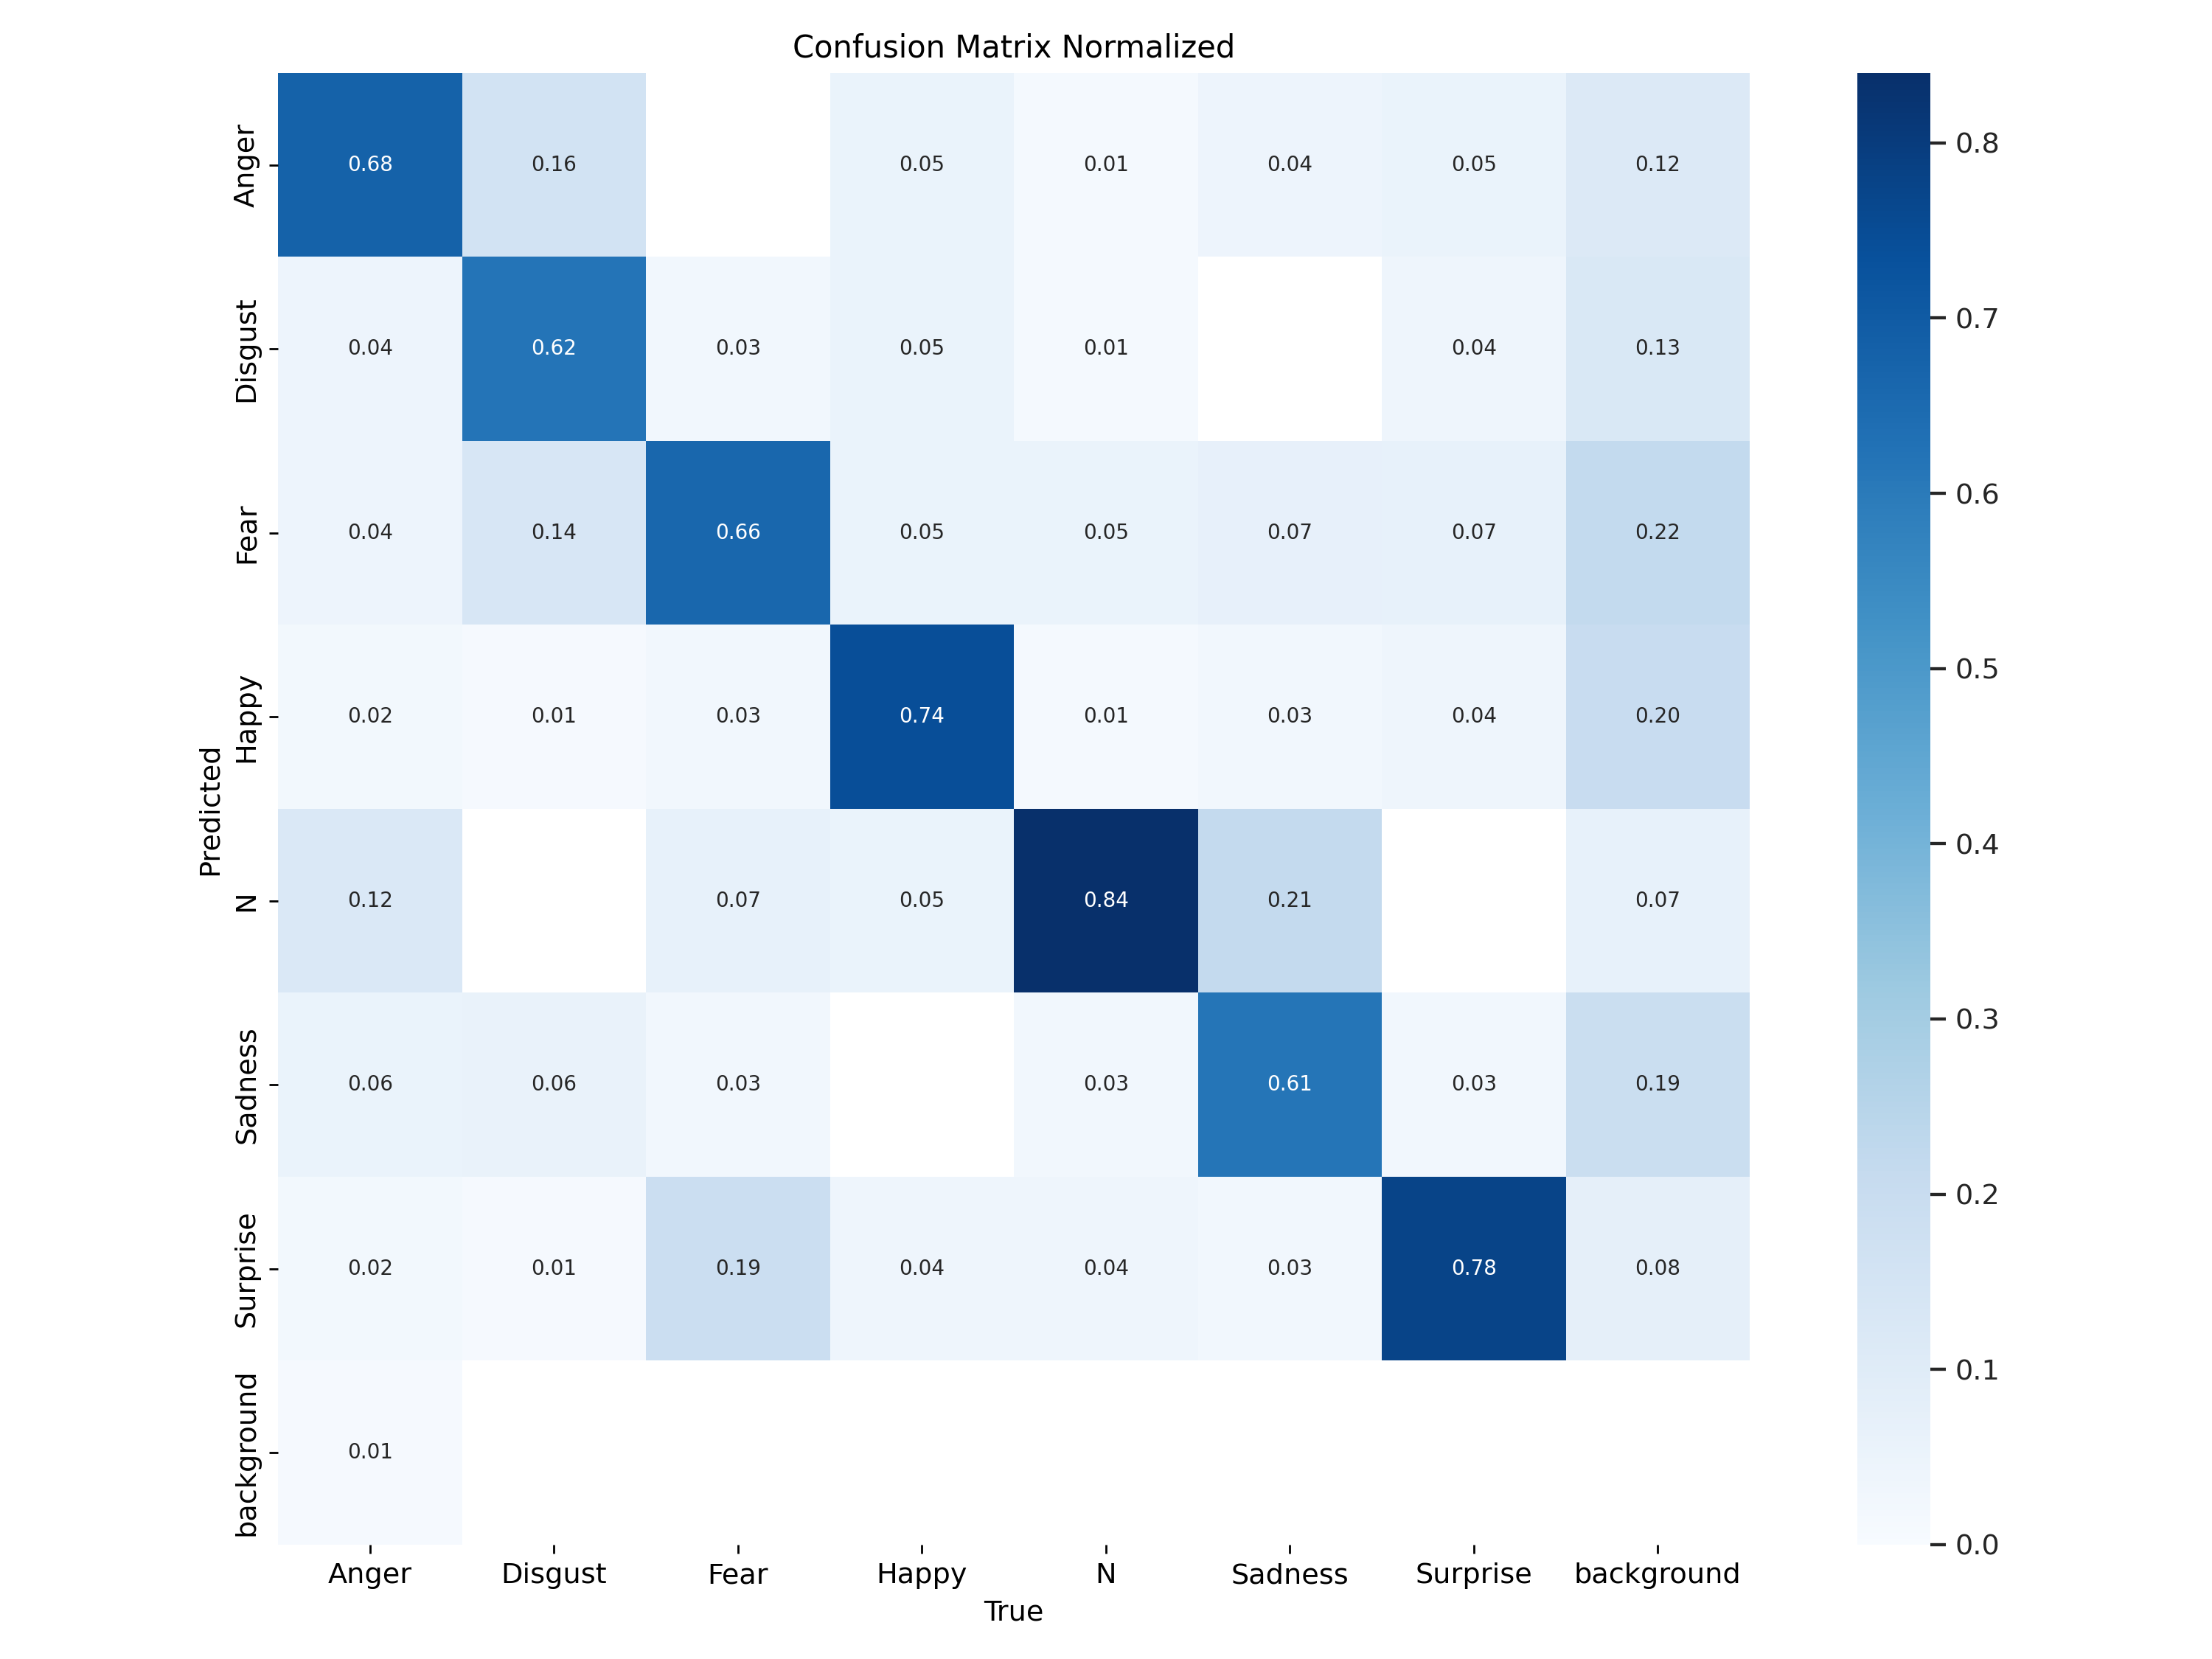

In [11]:
Image('/kaggle/working/runs/detect/train/confusion_matrix_normalized.png',width=800)

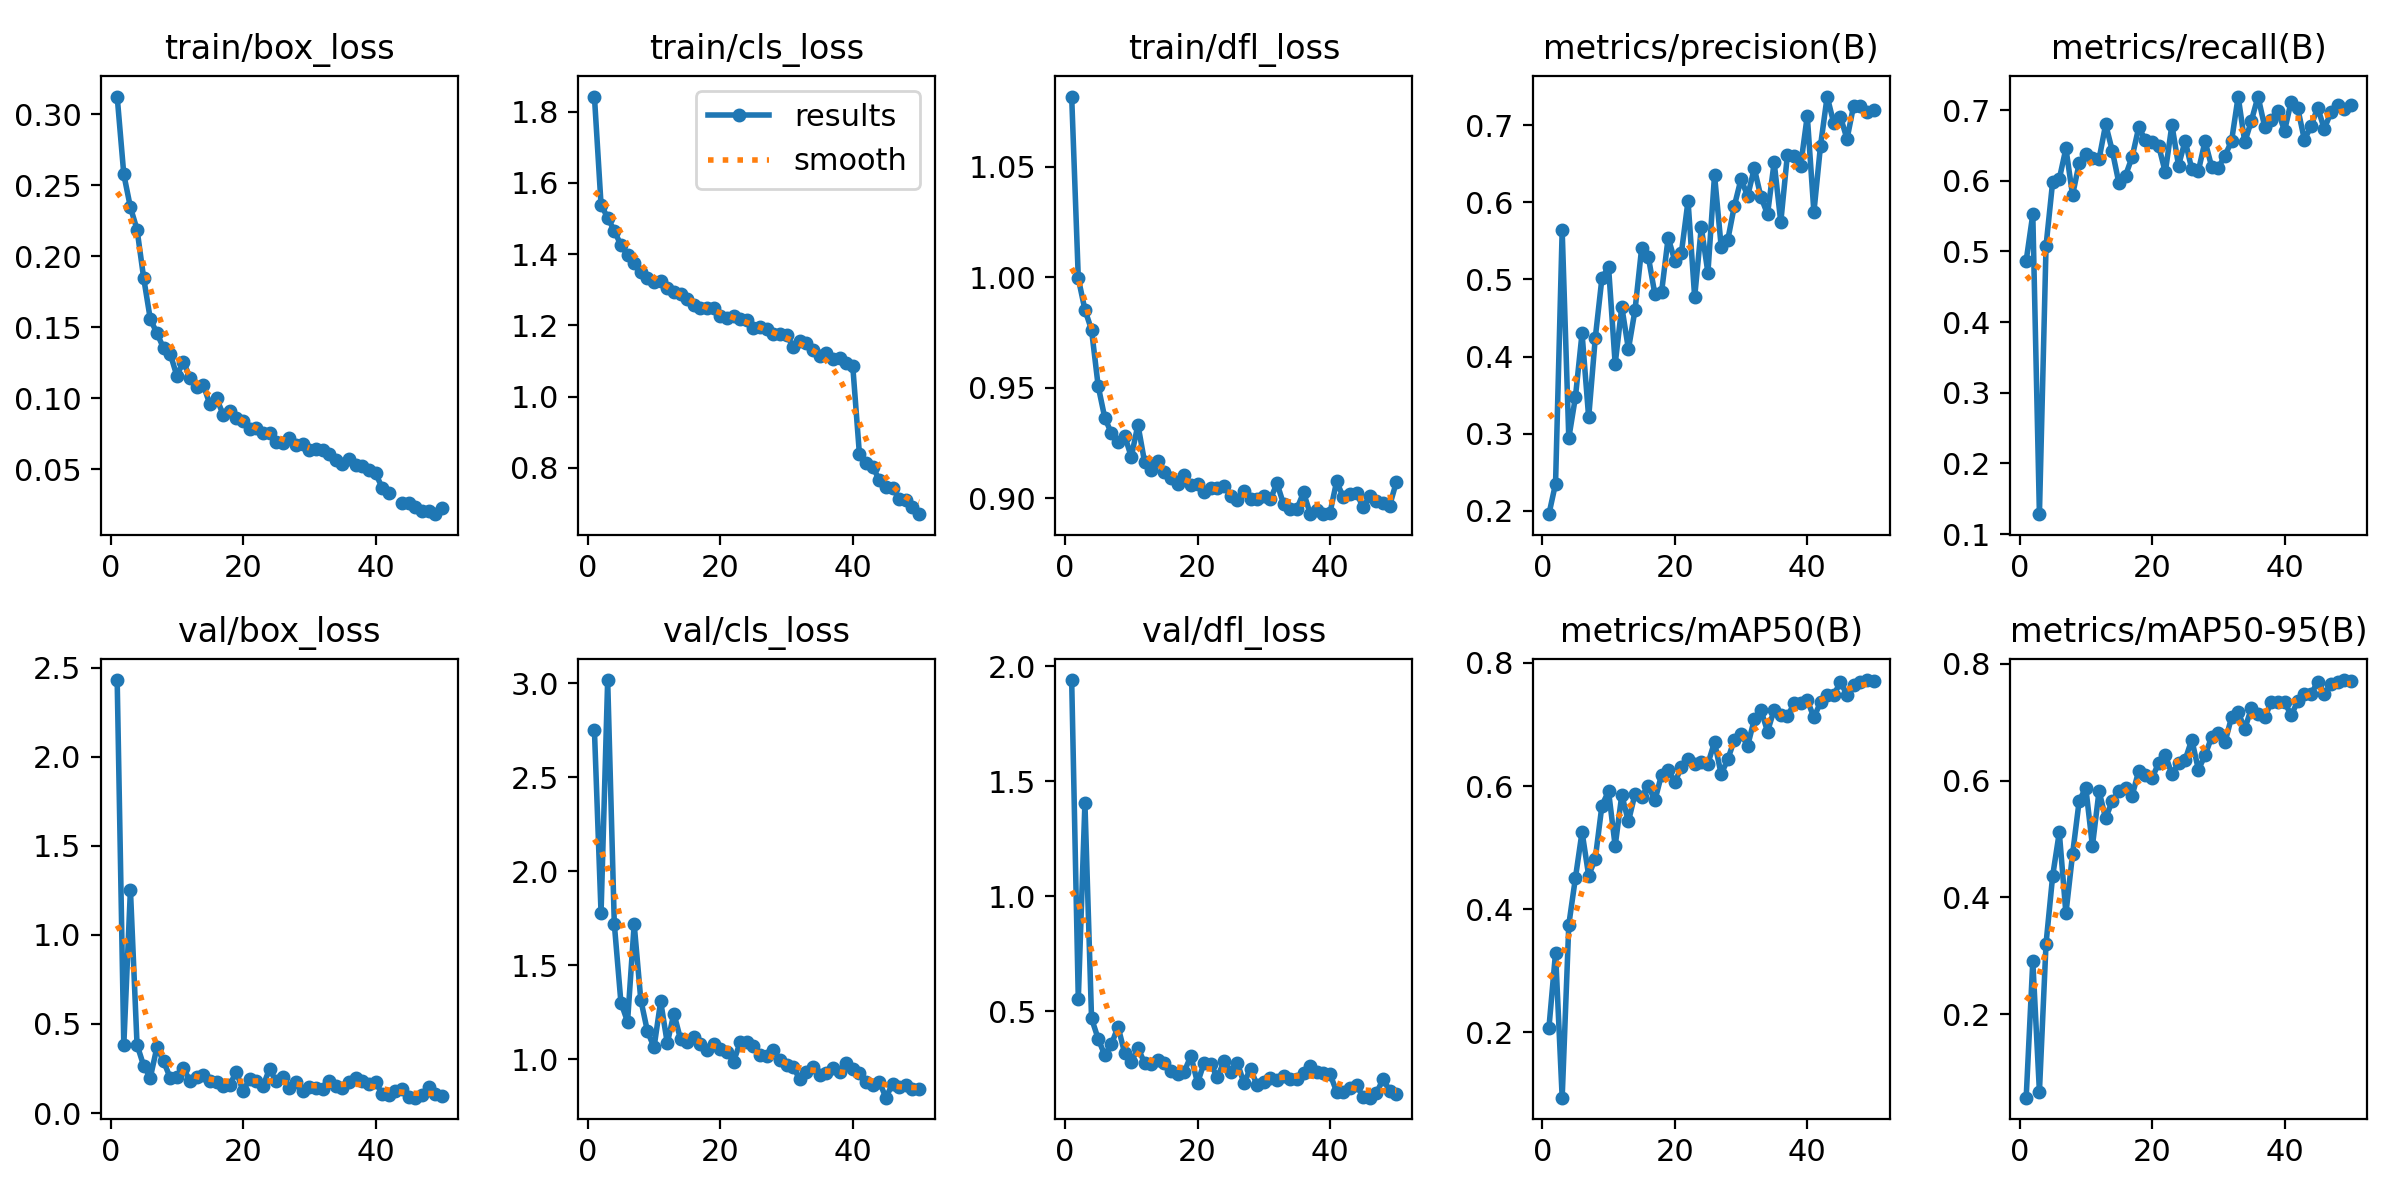

In [12]:
Image('/kaggle/working/runs/detect/train/results.png',width=800)

In [13]:
!yolo task=detect mode=val model='/kaggle/working/runs/detect/train/weights/best.pt' data={dataset.location}/data.yaml

Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 303 layers, 20,035,429 parameters, 0 gradients, 67.7 GFLOPs
val: Scanning /kaggle/working/expression-1/valid/labels.cache... 560 images, 0 b
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        560        560      0.718        0.7      0.772      0.772
                 Anger         90         90      0.726      0.611      0.755      0.755
               Disgust         81         81      0.797      0.605      0.779      0.779
                  Fear         74         74      0.638       0.73      0.683      0.683
                 Happy         94         94      0.783      0.777      0.848      0.848
                     N         75         75      0.658        0.8      0.799      0.799
               Sadness         70         70      0.688      0.629      0.726      0.726
              Surprise         76         76      0.73

In [14]:
!yolo task=detect mode=predict model='/kaggle/working/runs/detect/train/weights/best.pt' conf=.25 data={dataset.location}/test/images save=True source={dataset.location}/test/images

Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 303 layers, 20,035,429 parameters, 0 gradients, 67.7 GFLOPs

image 1/558 /kaggle/working/expression-1/test/images/F0001_AN02WH_F2D_png_jpg.rf.ca4644bfdc572c1e6e7bf1a1fca616f2.jpg: 640x640 1 Anger, 36.9ms
image 2/558 /kaggle/working/expression-1/test/images/F0001_SA02WH_F2D_png_jpg.rf.660d2c1fd533210b616c52d15cd923dc.jpg: 640x640 1 Sadness, 36.9ms
image 3/558 /kaggle/working/expression-1/test/images/F0002_DI01BL_F2D_png_jpg.rf.89b464682af33d014f20d262c51c689c.jpg: 640x640 1 Disgust, 36.8ms
image 4/558 /kaggle/working/expression-1/test/images/F0002_HA02BL_F2D_png_jpg.rf.8880b554b3377203a08da7a06a1164a0.jpg: 640x640 1 Happy, 36.8ms
image 5/558 /kaggle/working/expression-1/test/images/F0003_AN04LA_F2D_png_jpg.rf.467caa3b1e9b0a872f8ab9ef34ccbed8.jpg: 640x640 1 Anger, 36.9ms
image 6/558 /kaggle/working/expression-1/test/images/F0003_FE03LA_F2D_png_jpg.rf.32d293febd62aff853dbfe36f321aa09.jpg: 

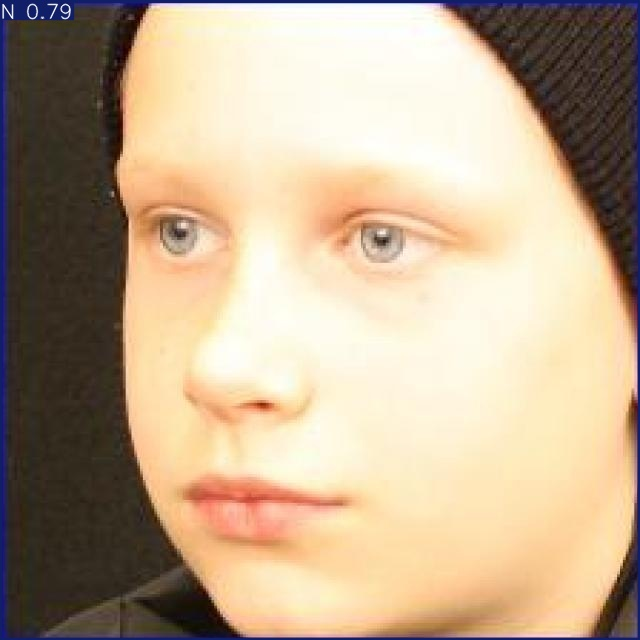

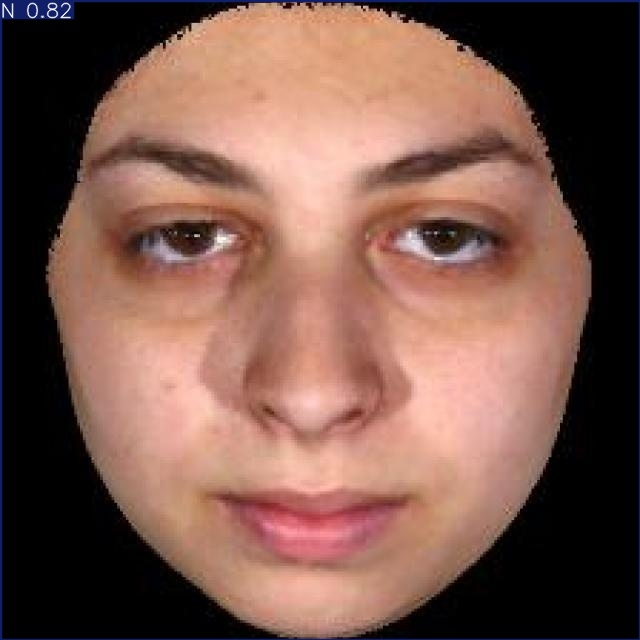

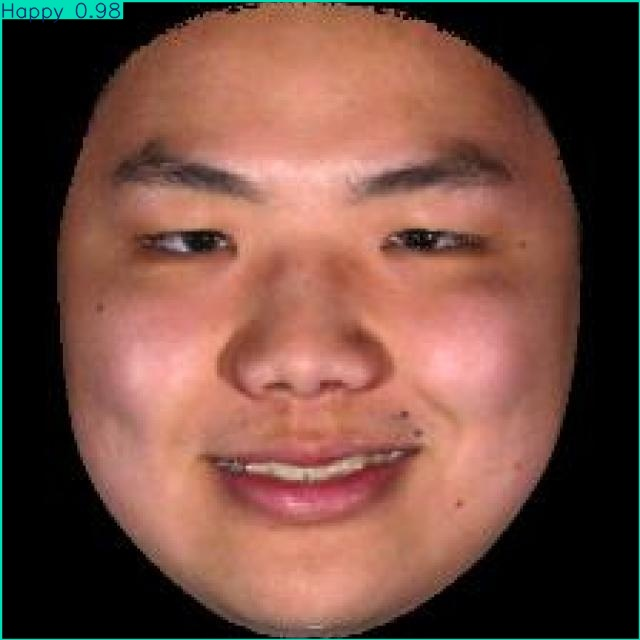

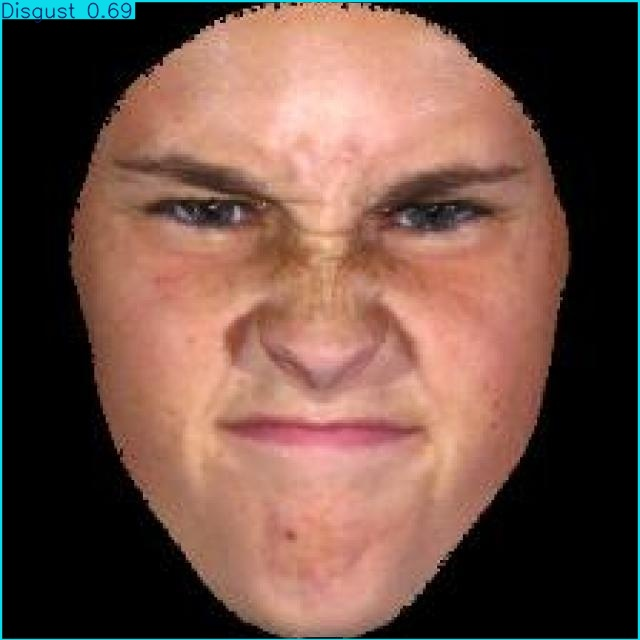

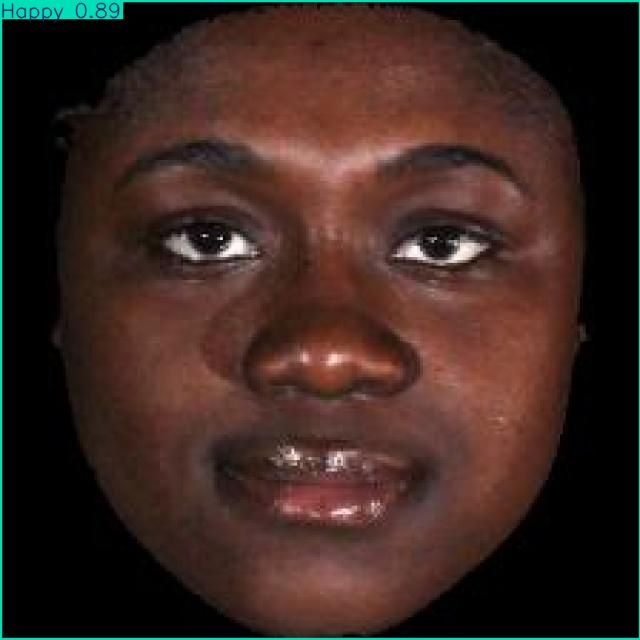

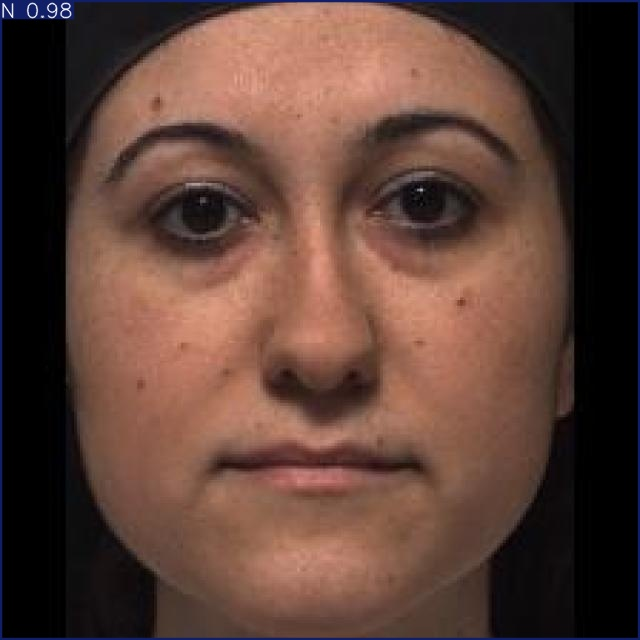

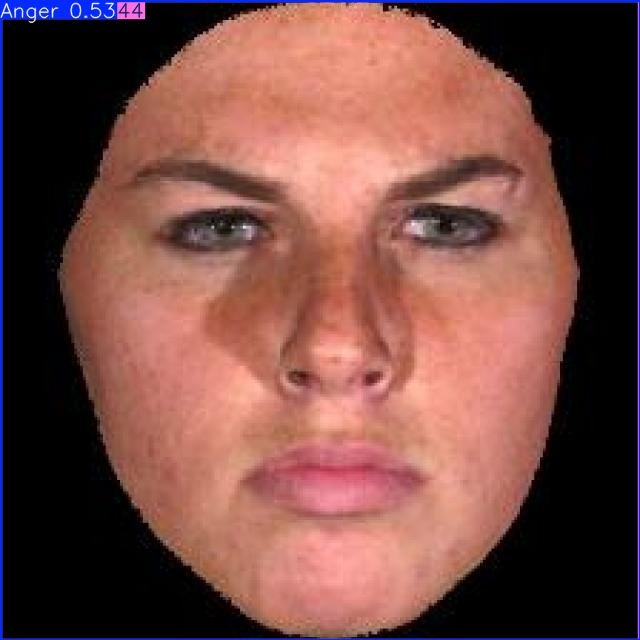

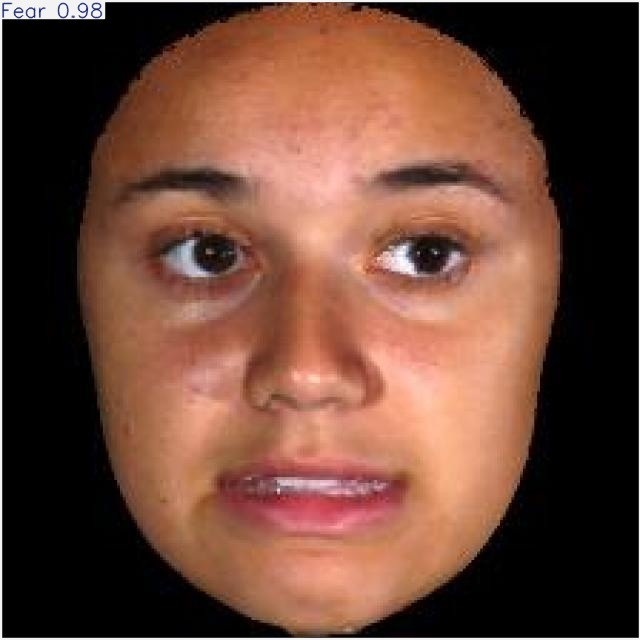

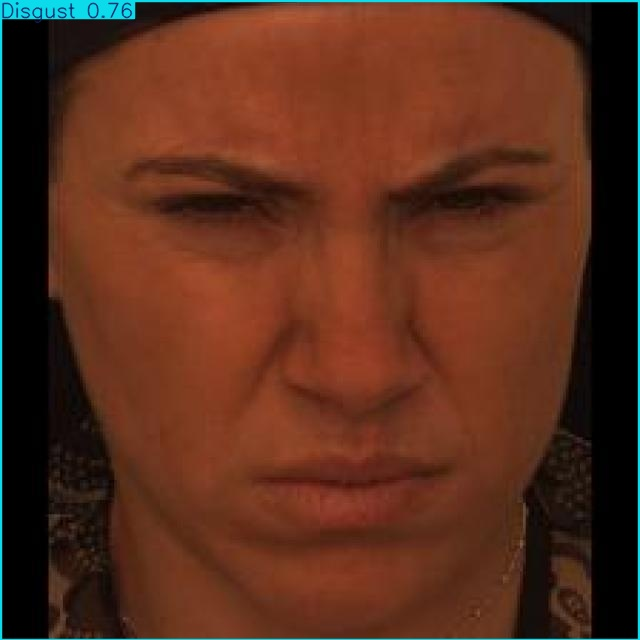

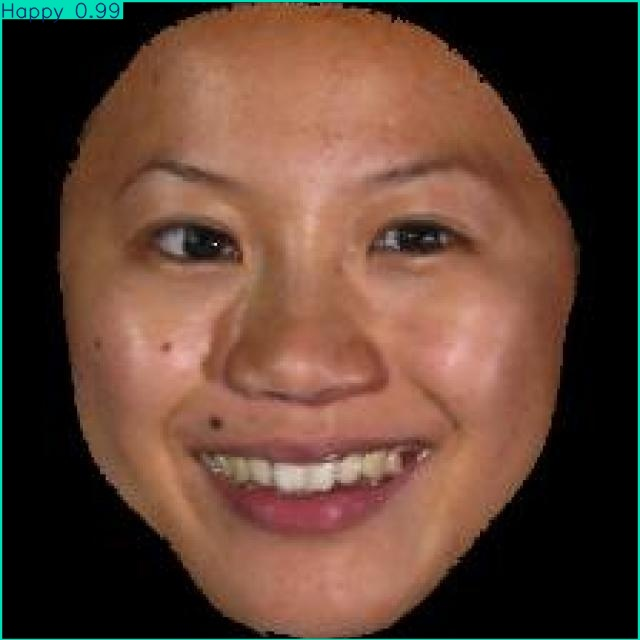

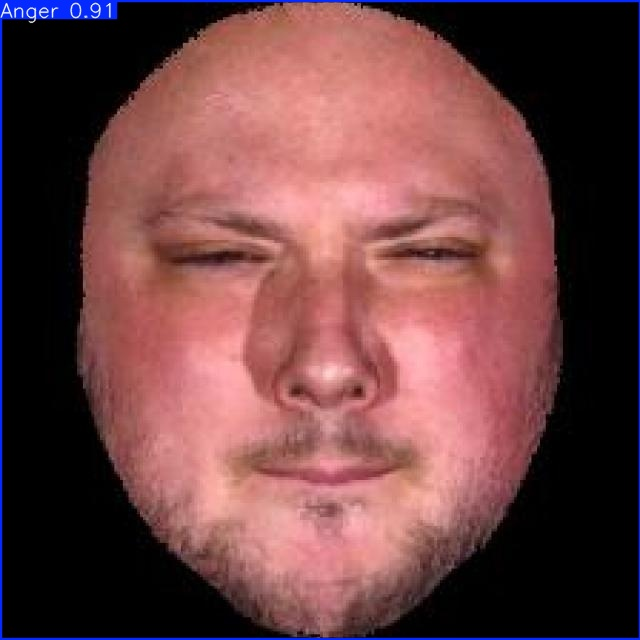

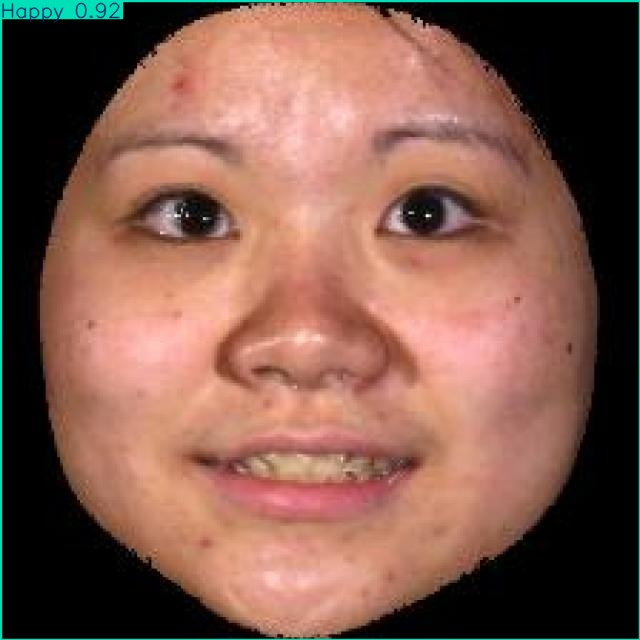

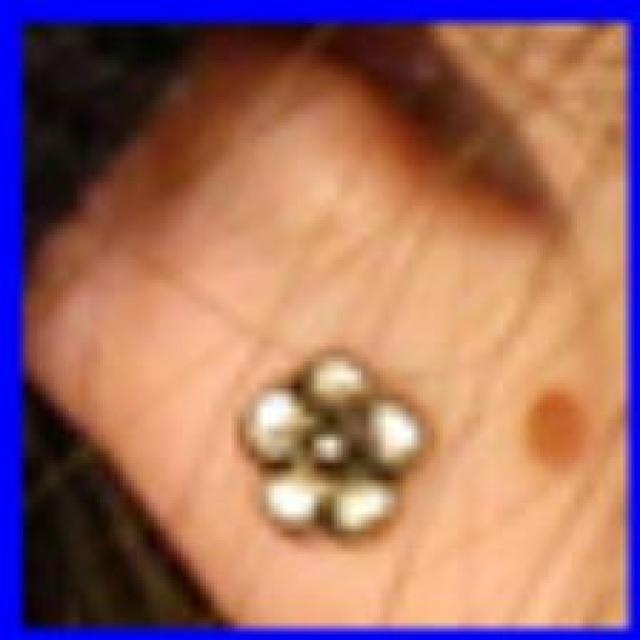

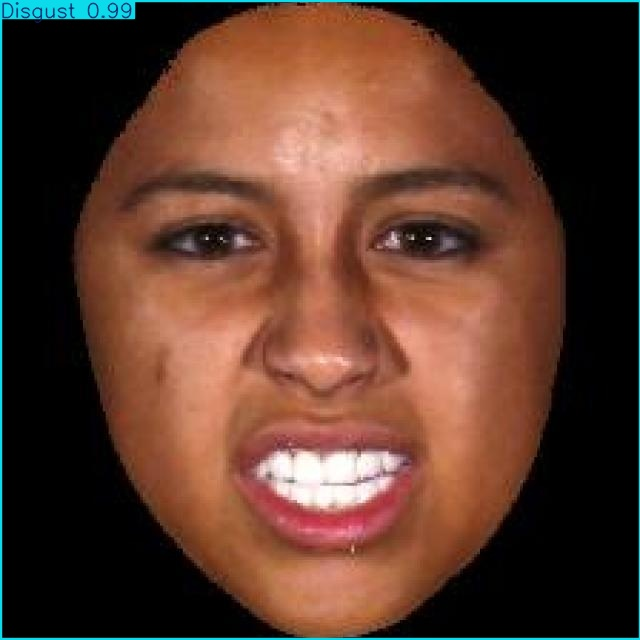

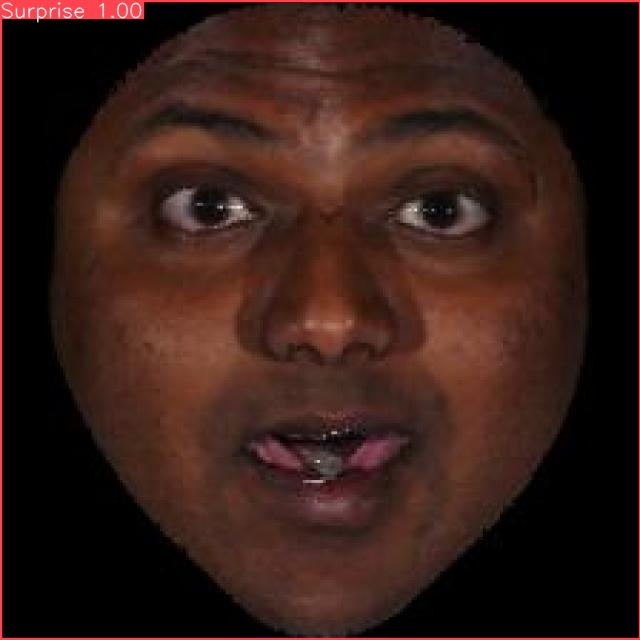

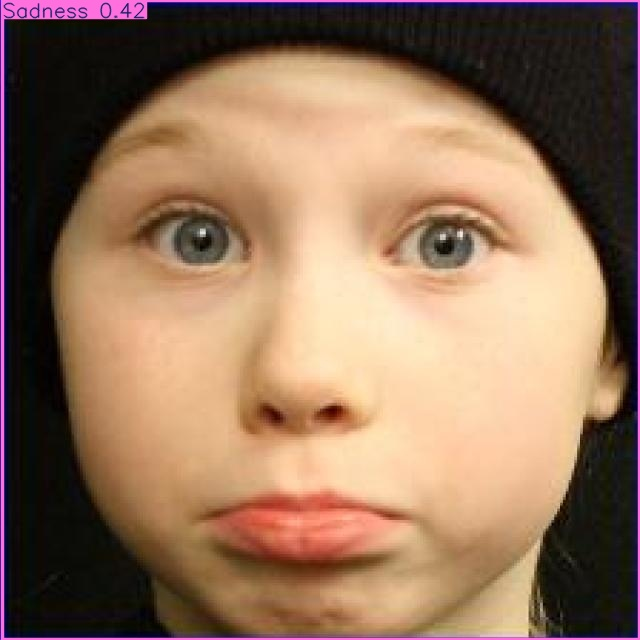

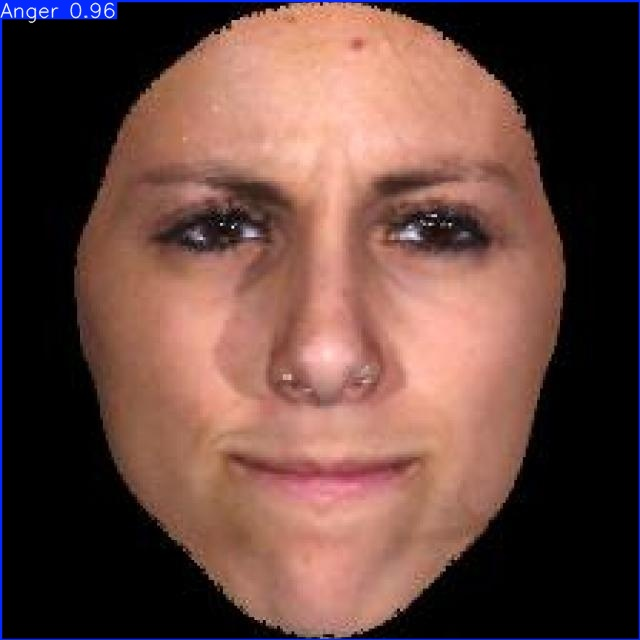

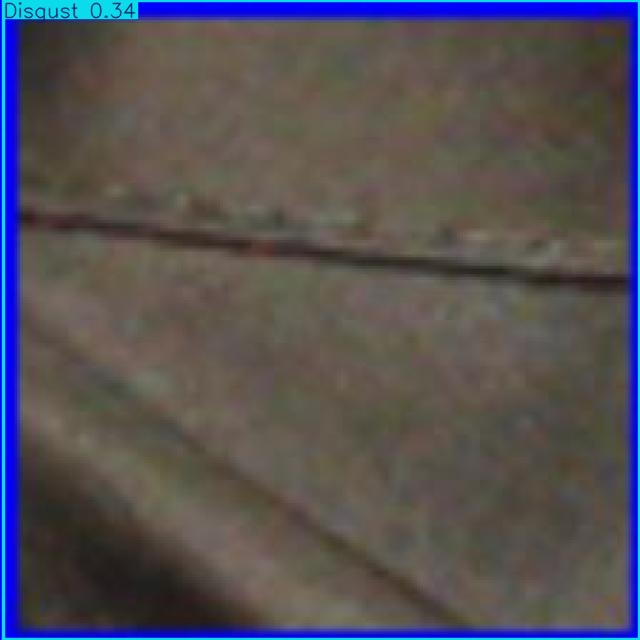

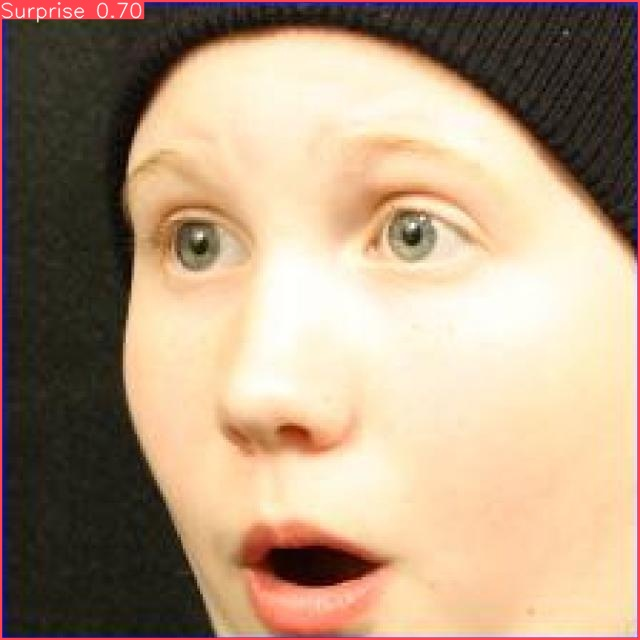

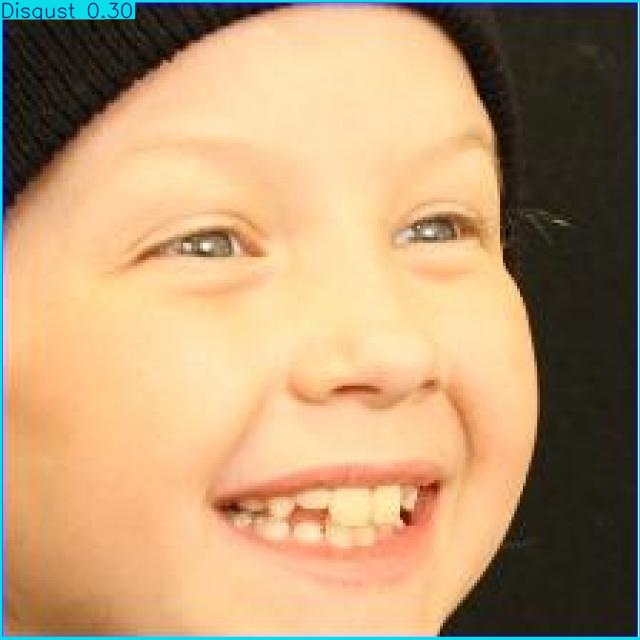

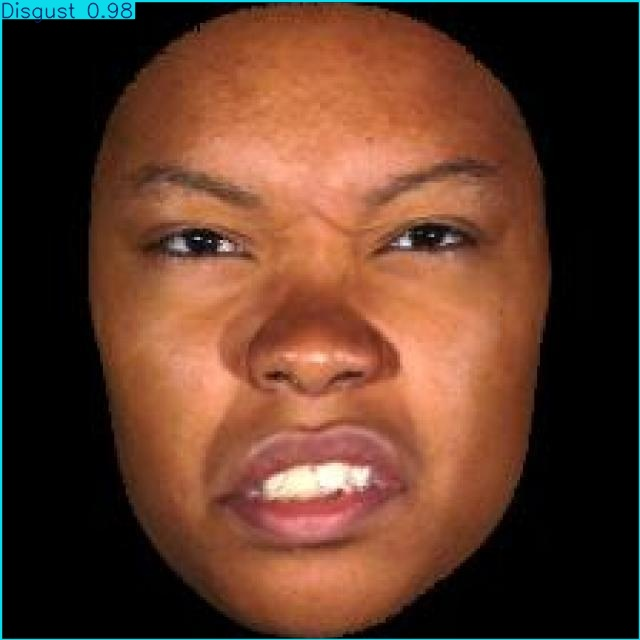

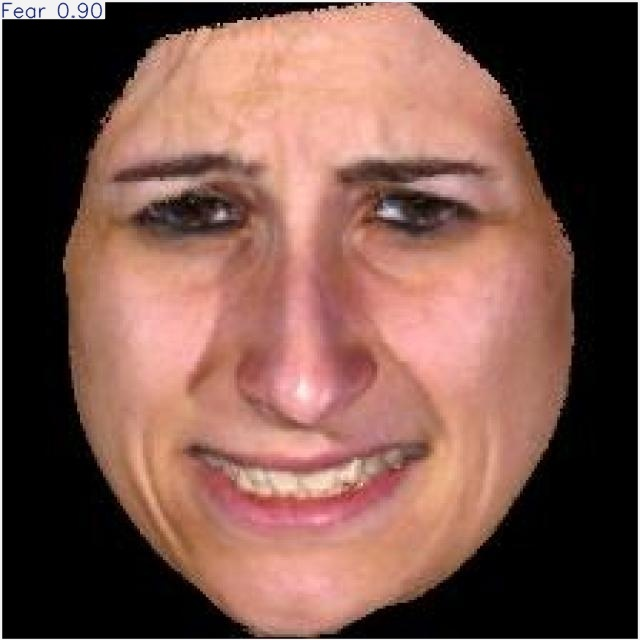

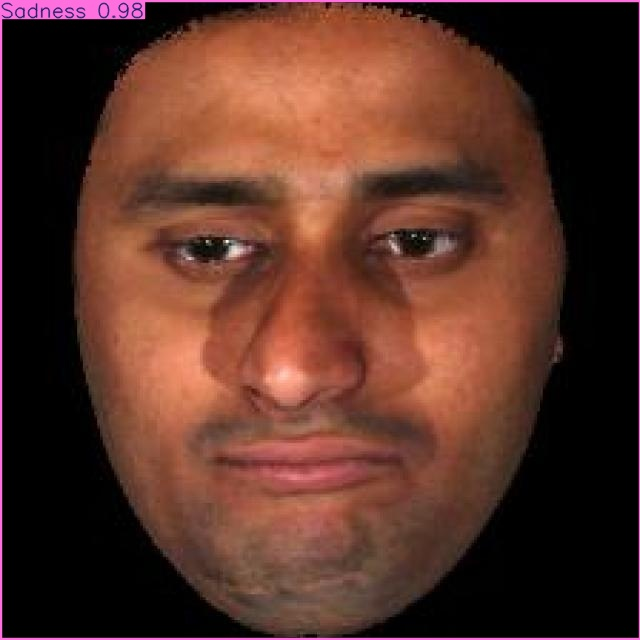

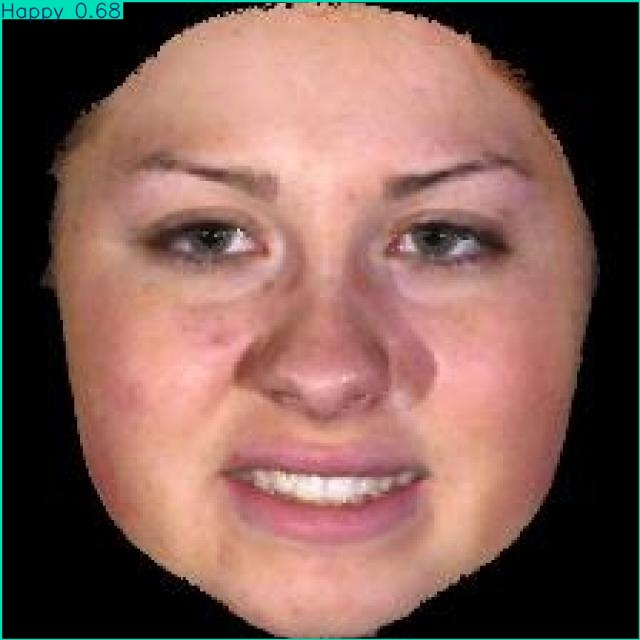

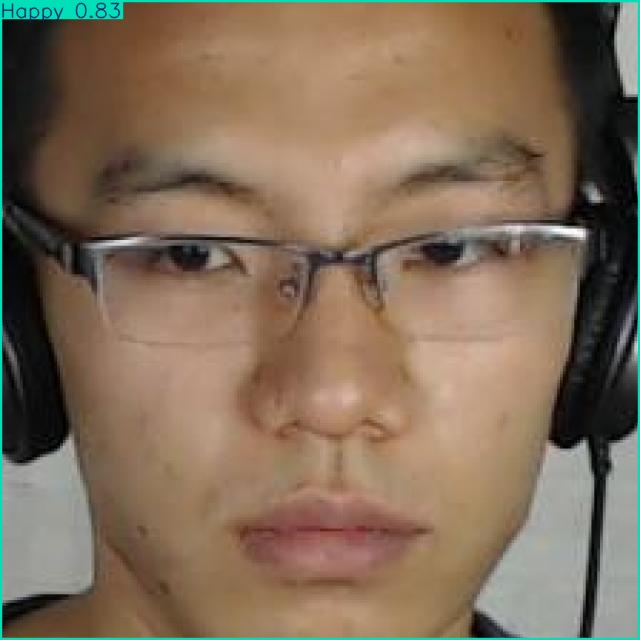

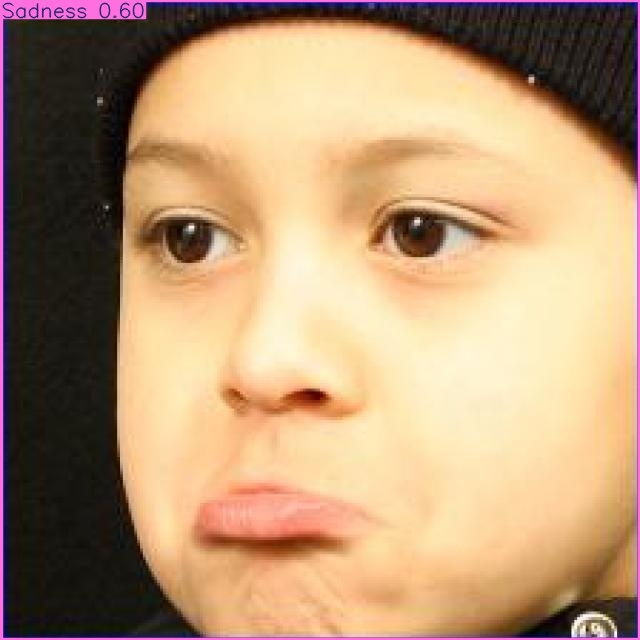

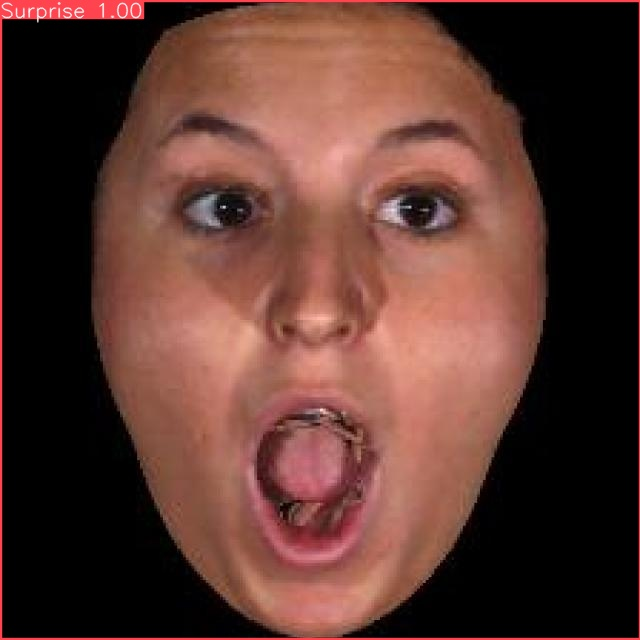

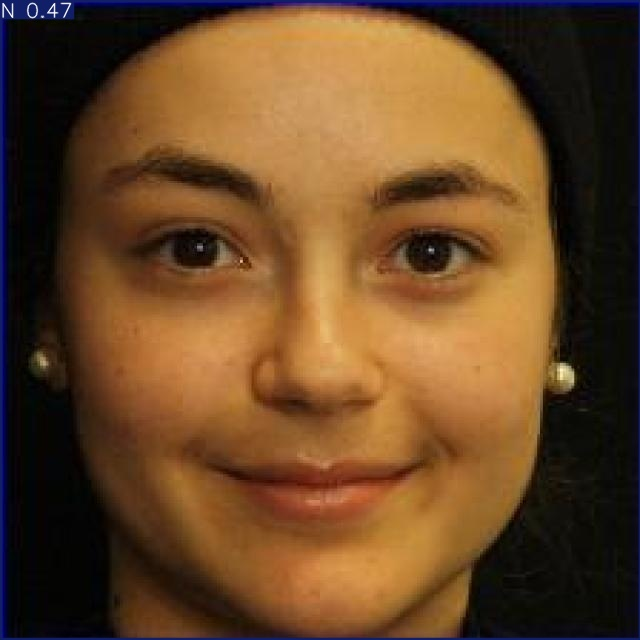

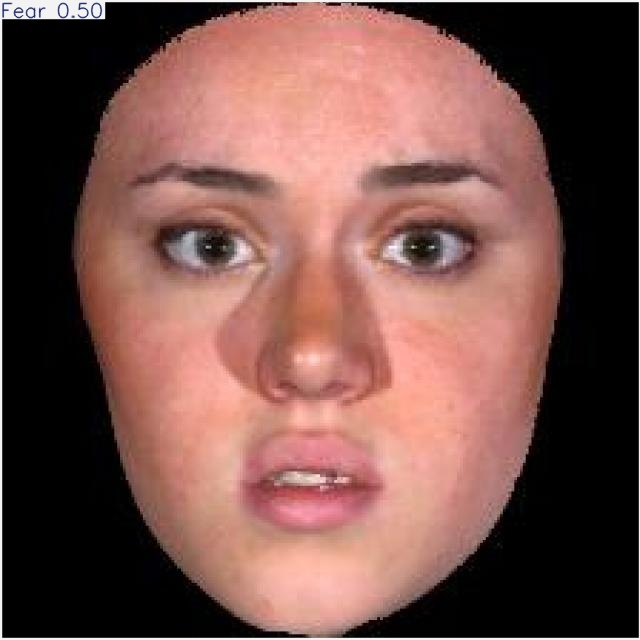

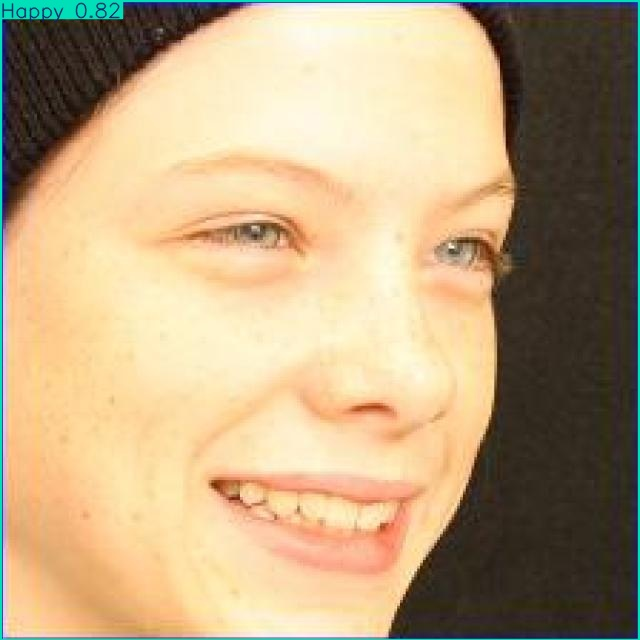

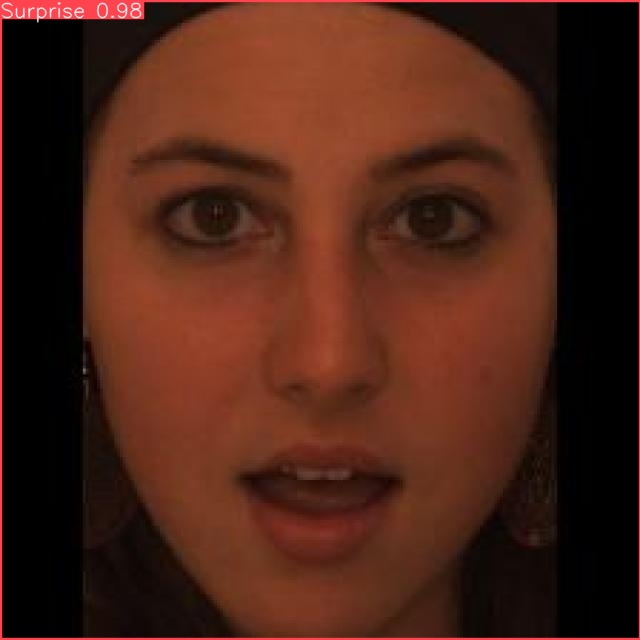

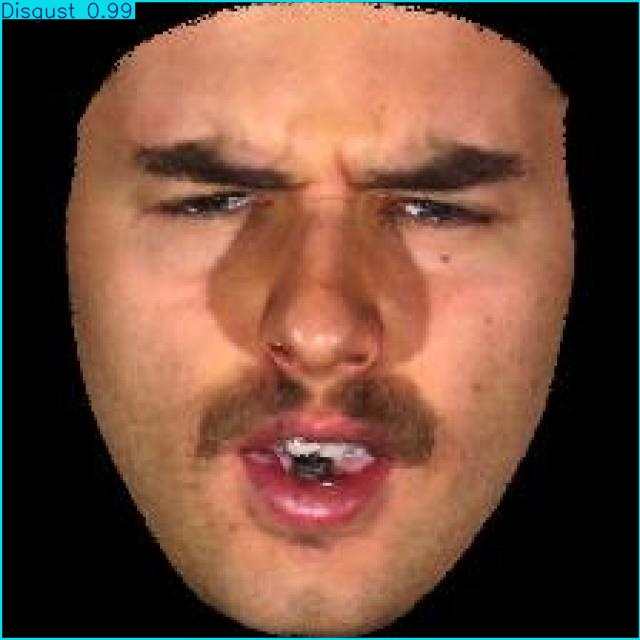

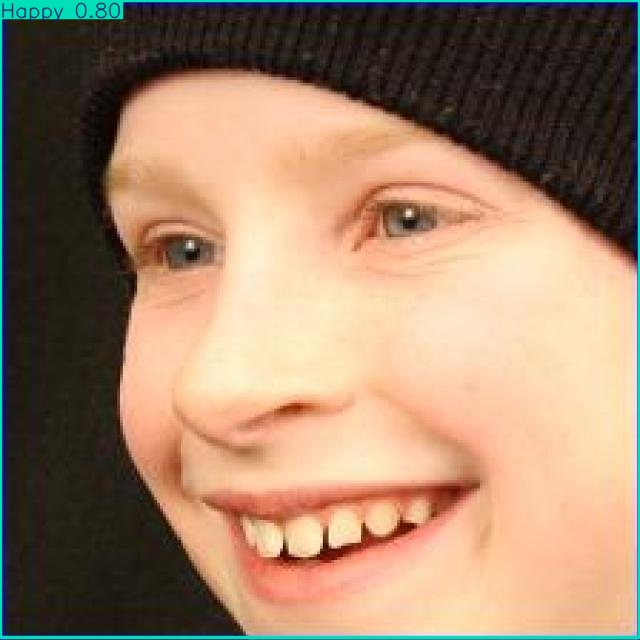

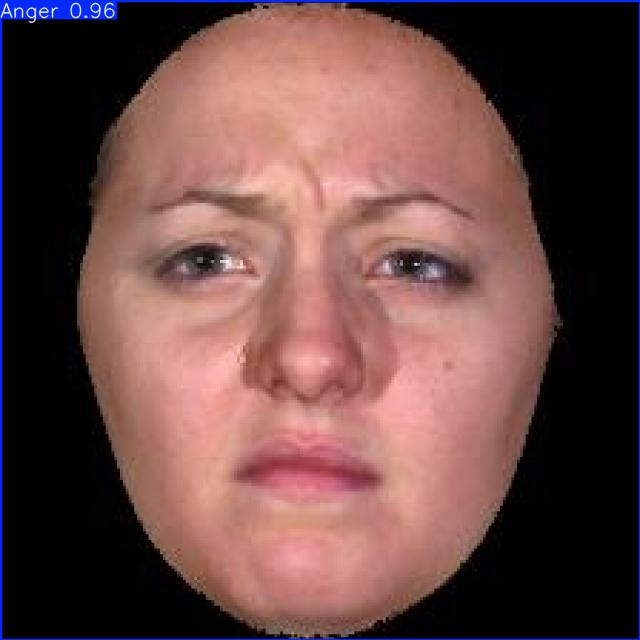

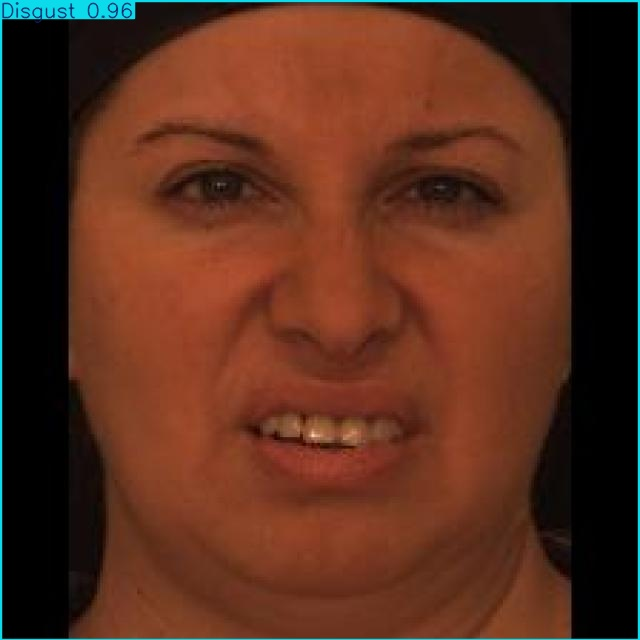

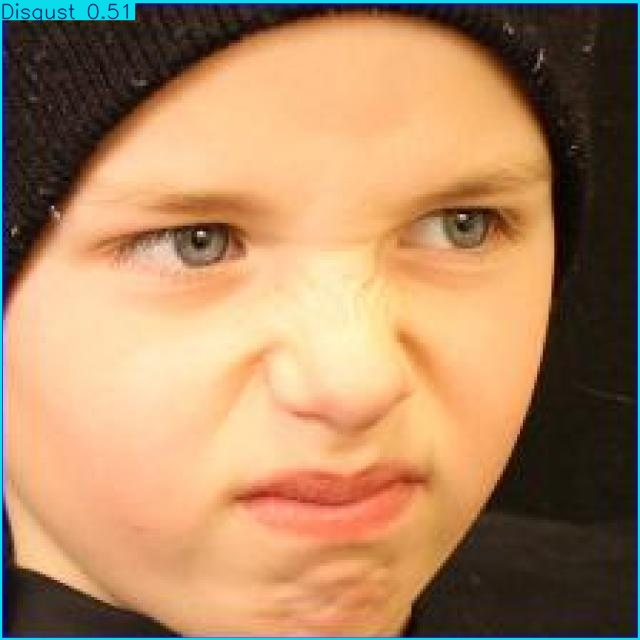

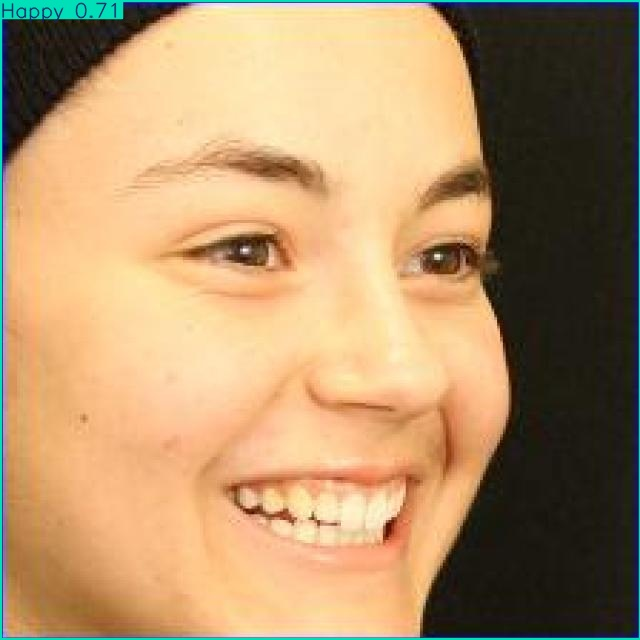

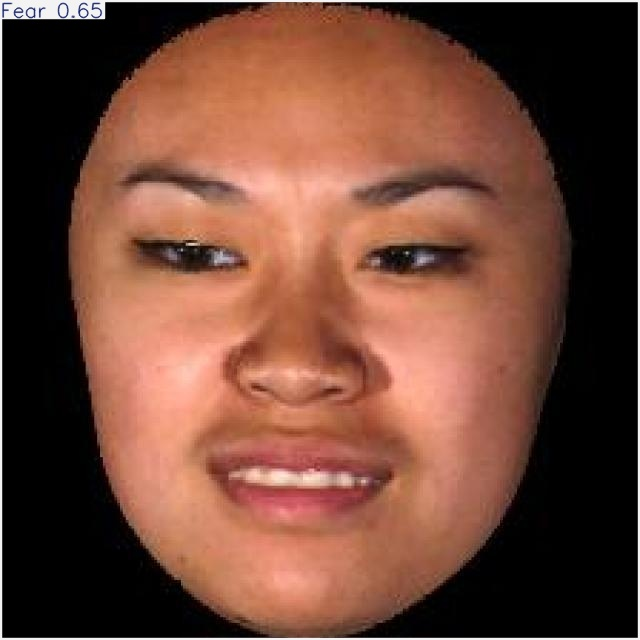

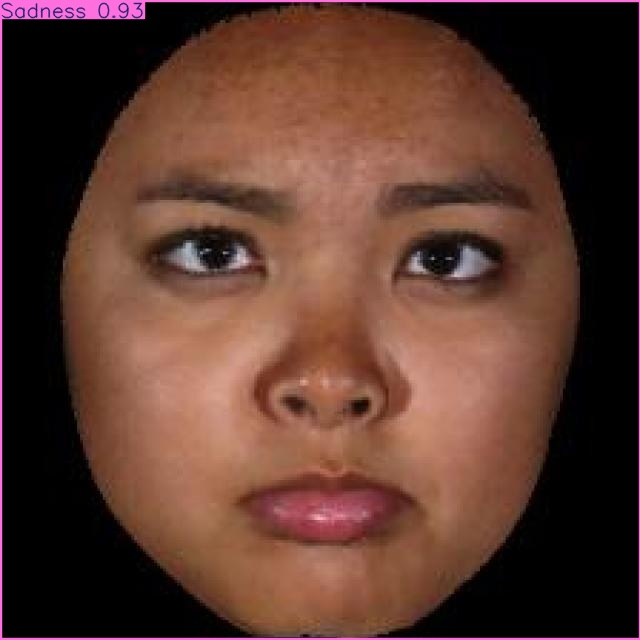

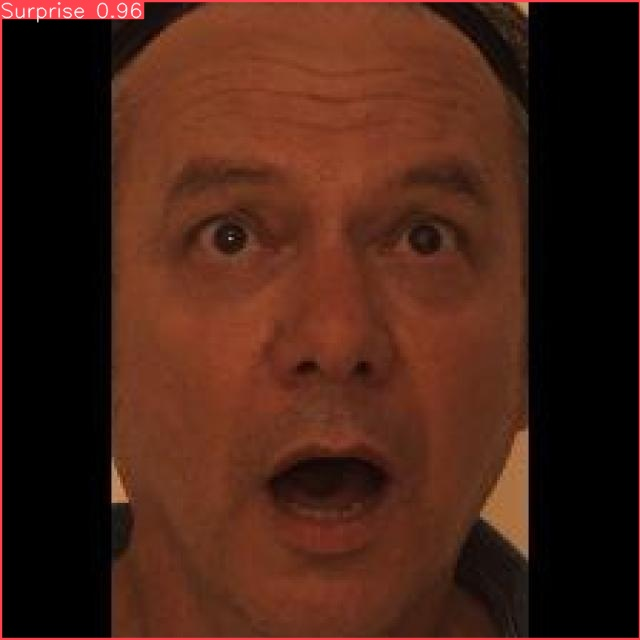

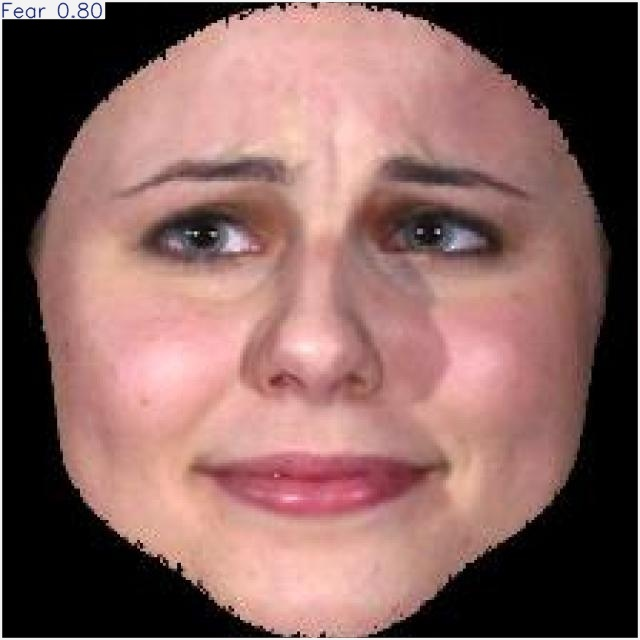

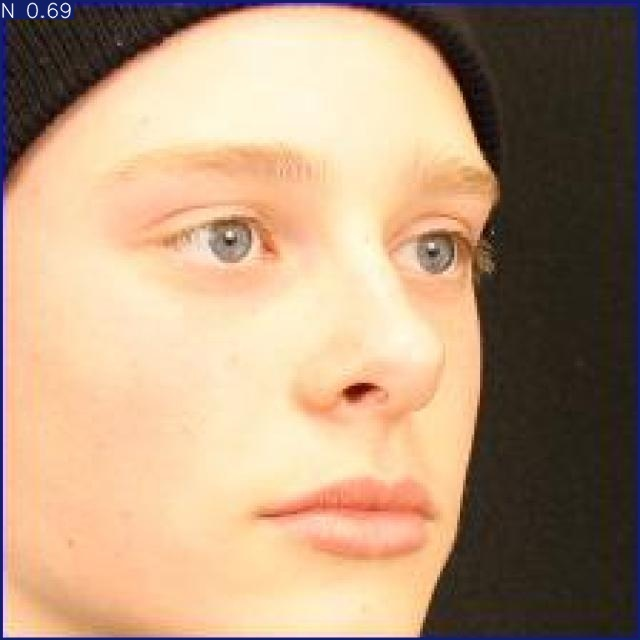

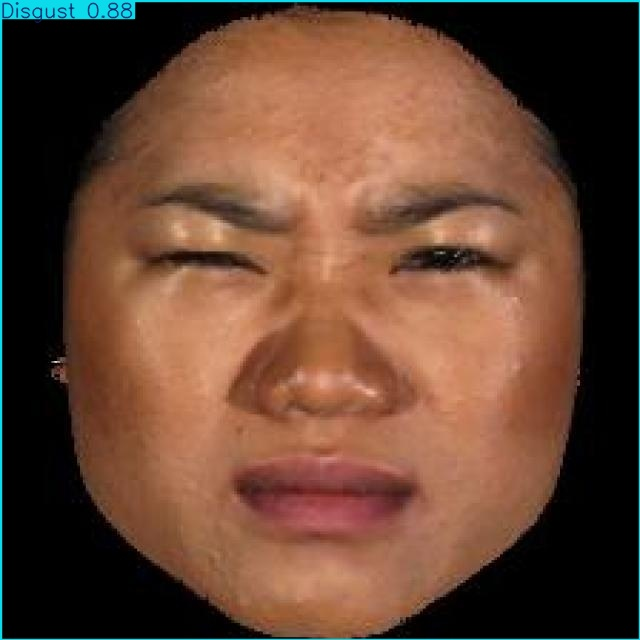

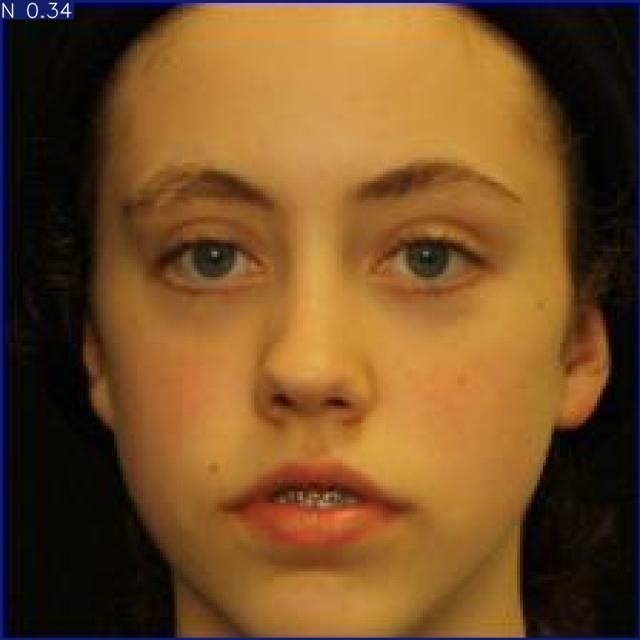

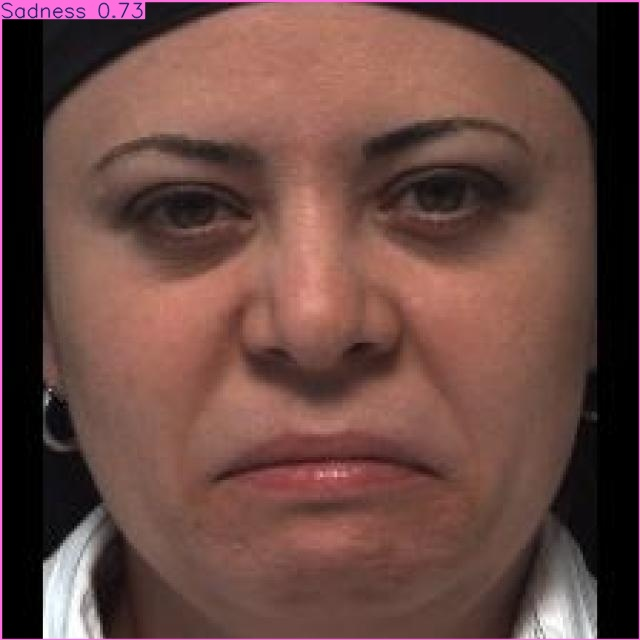

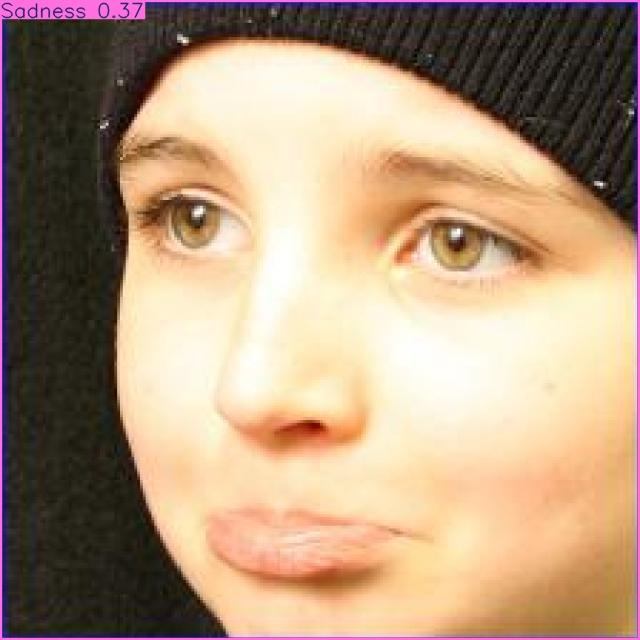

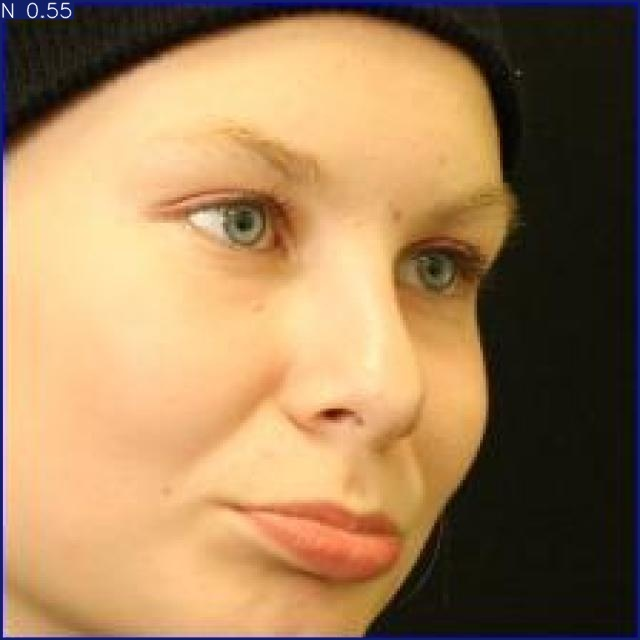

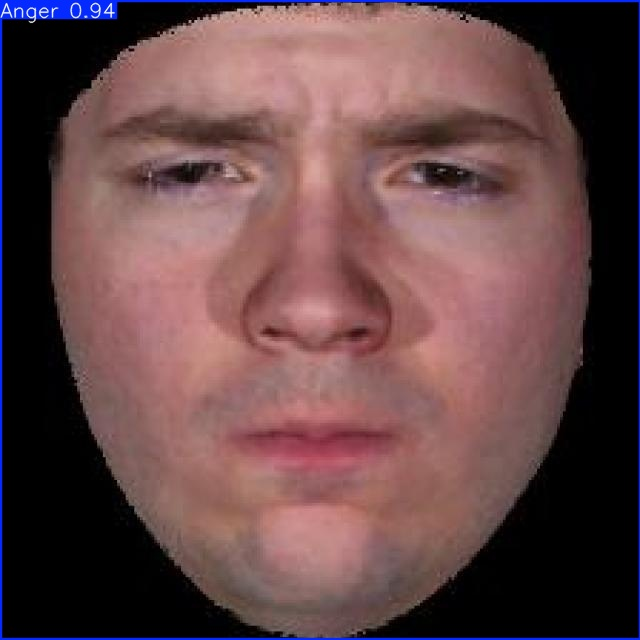

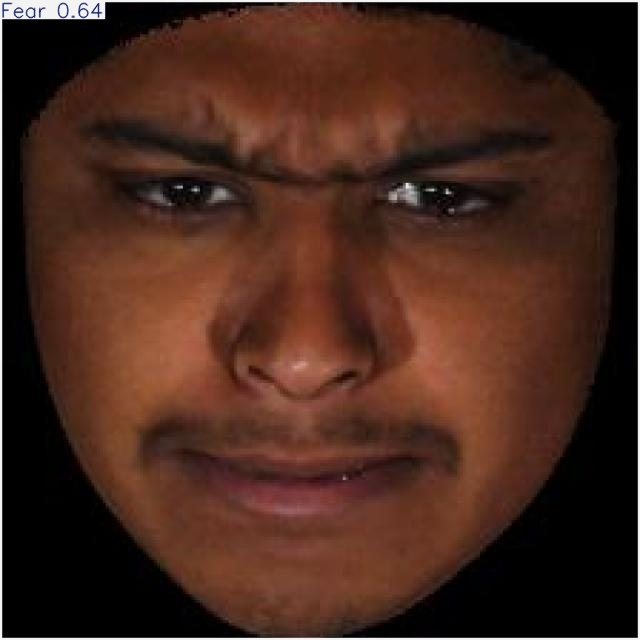

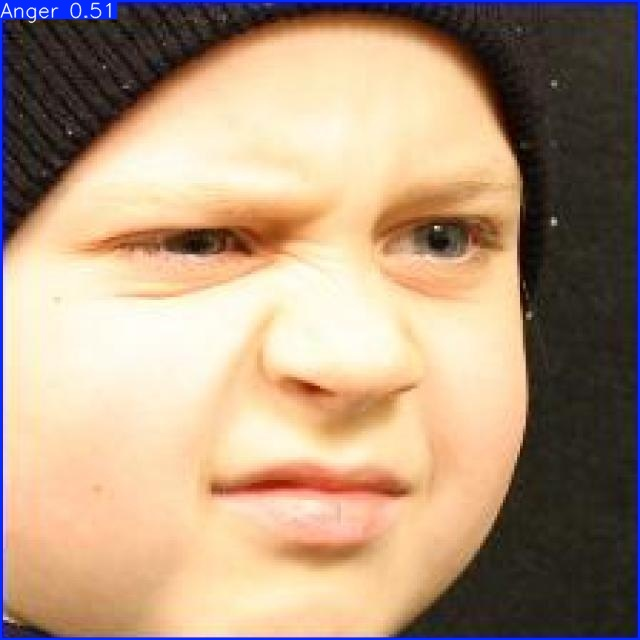

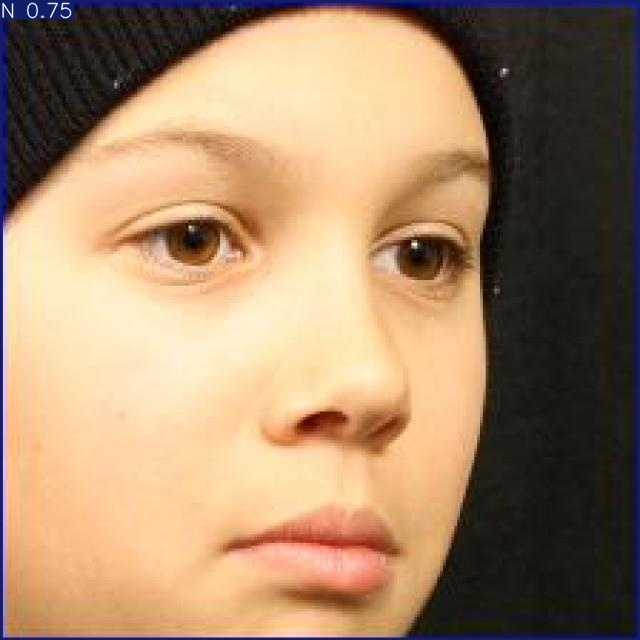

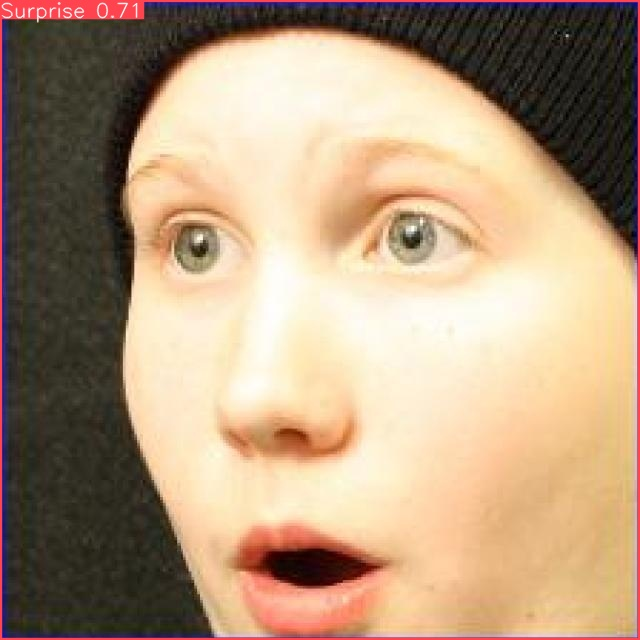

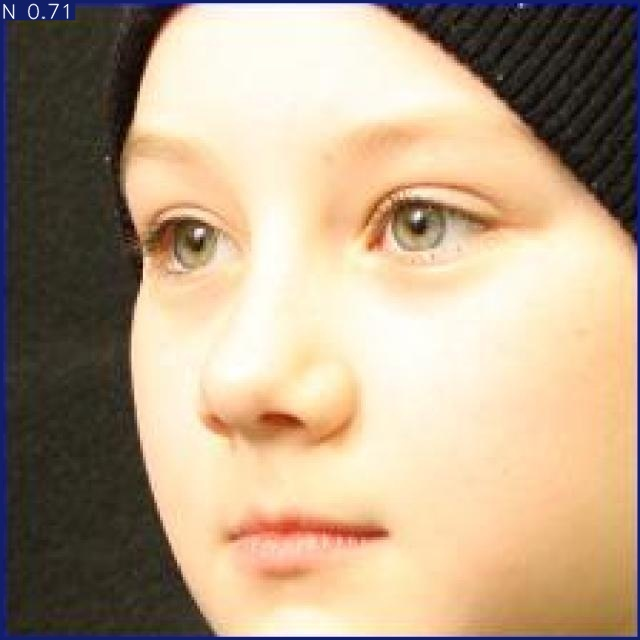

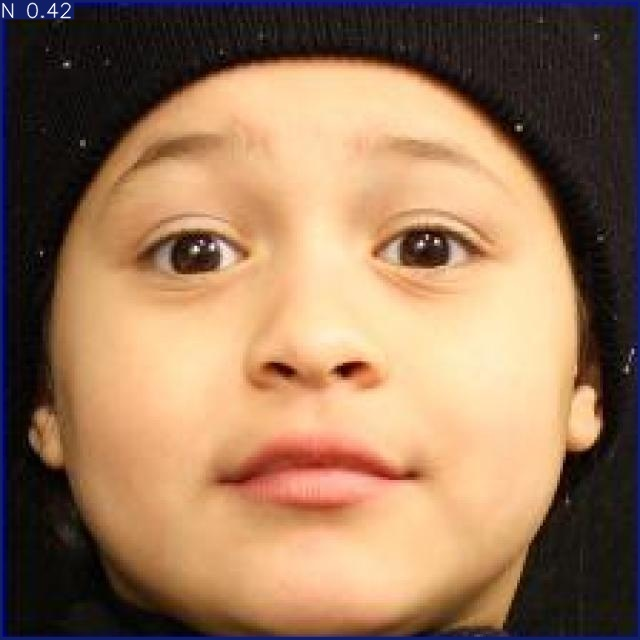

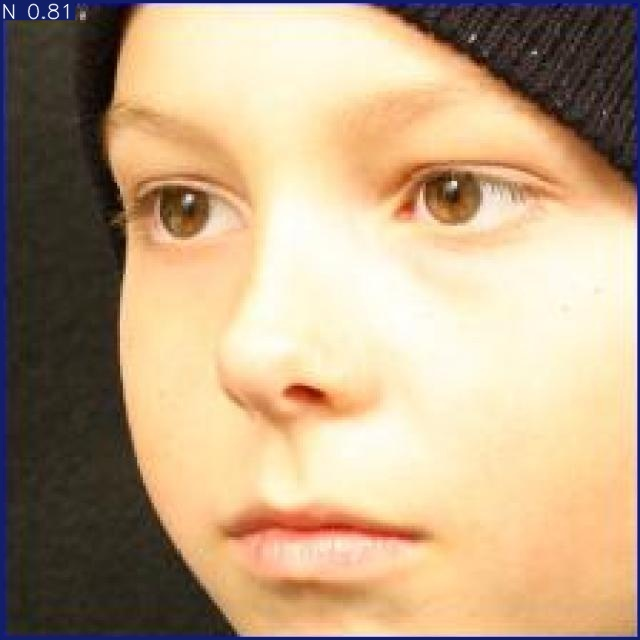

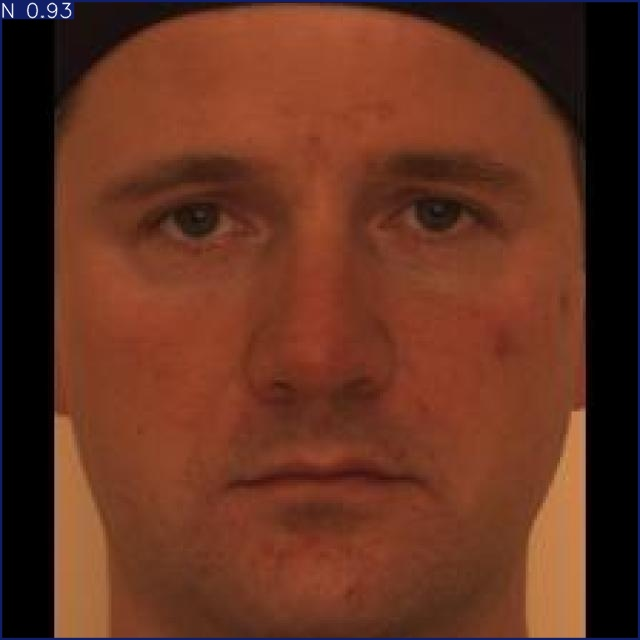

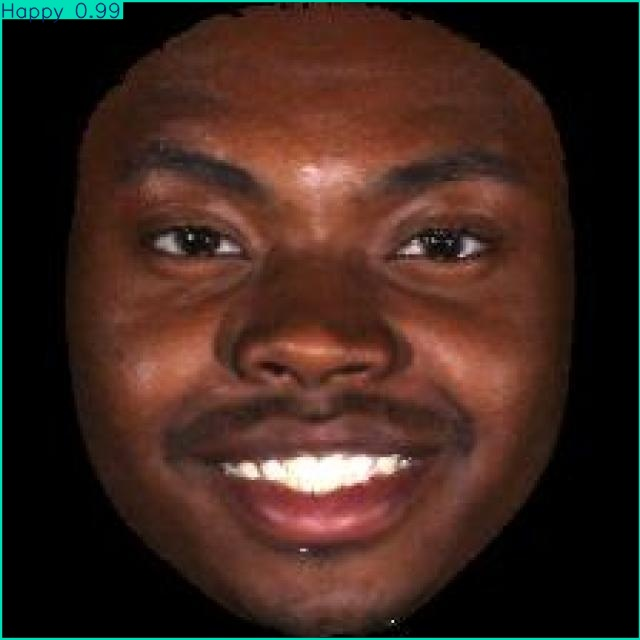

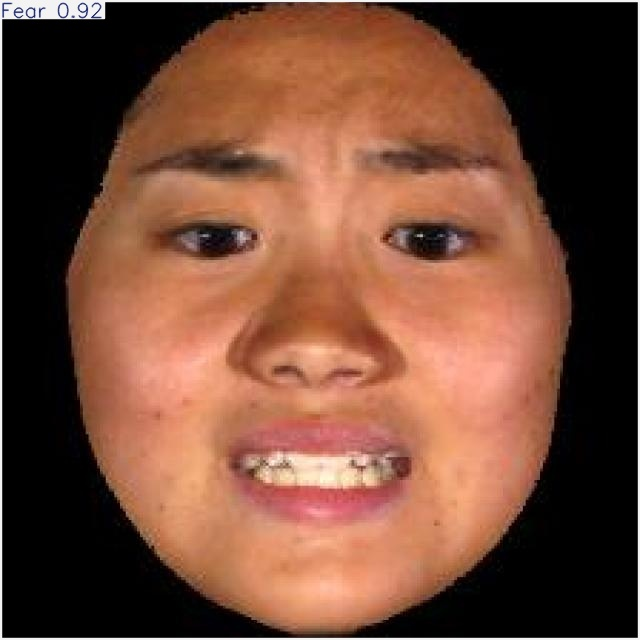

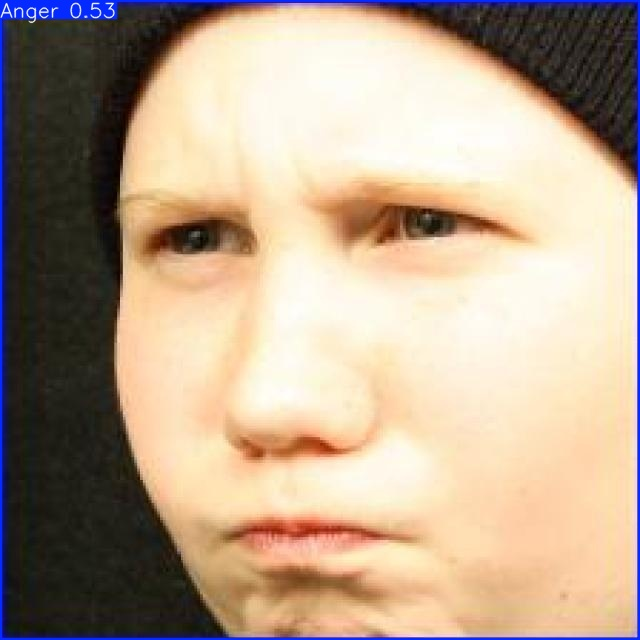

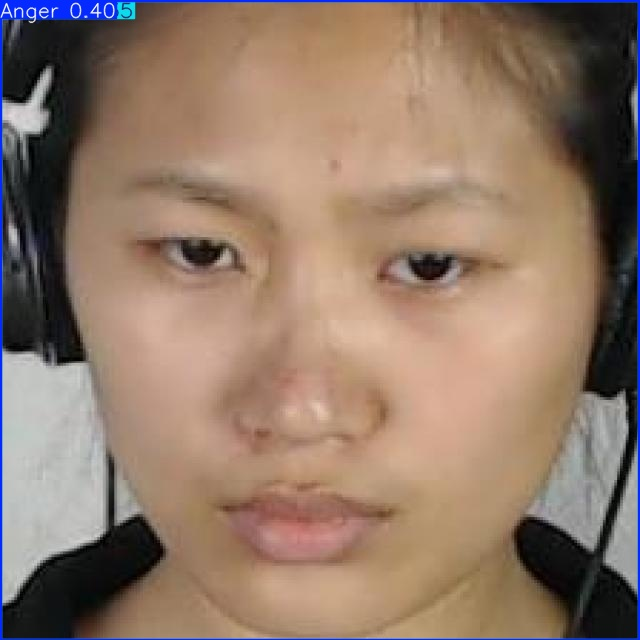

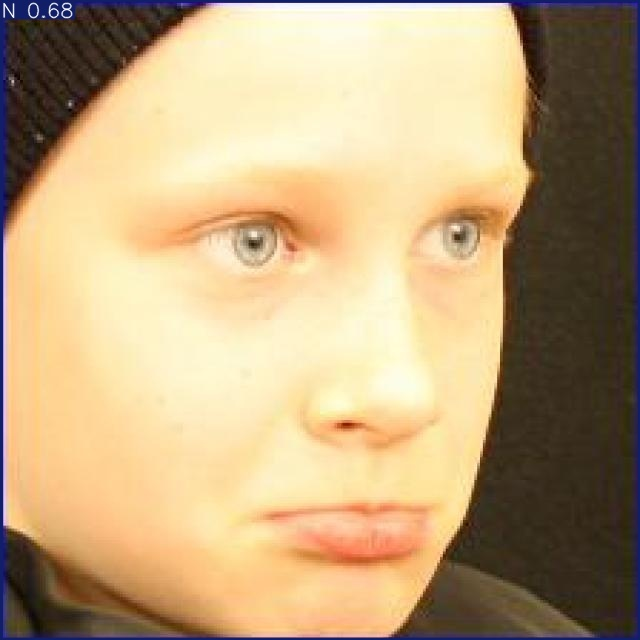

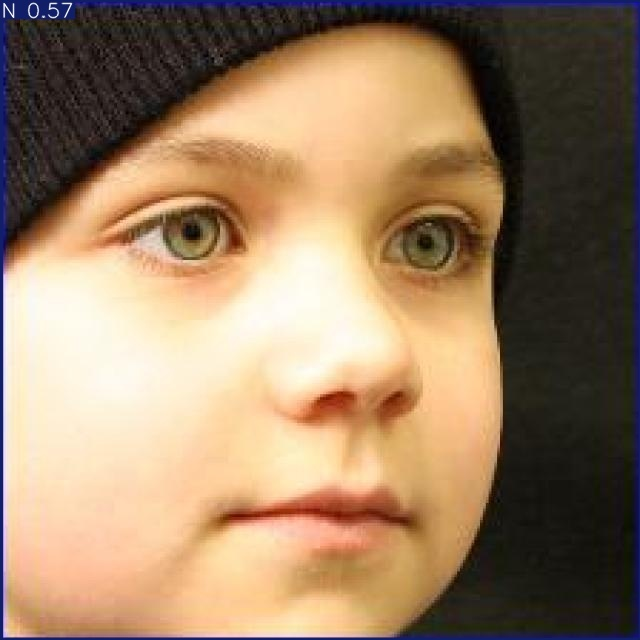

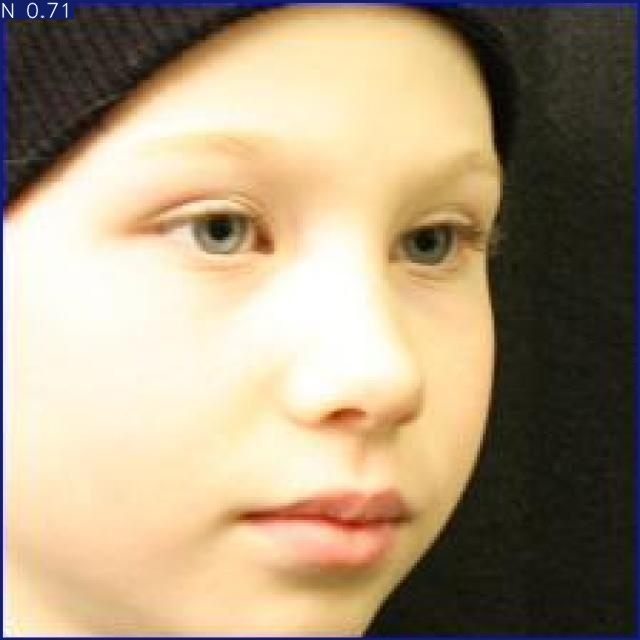

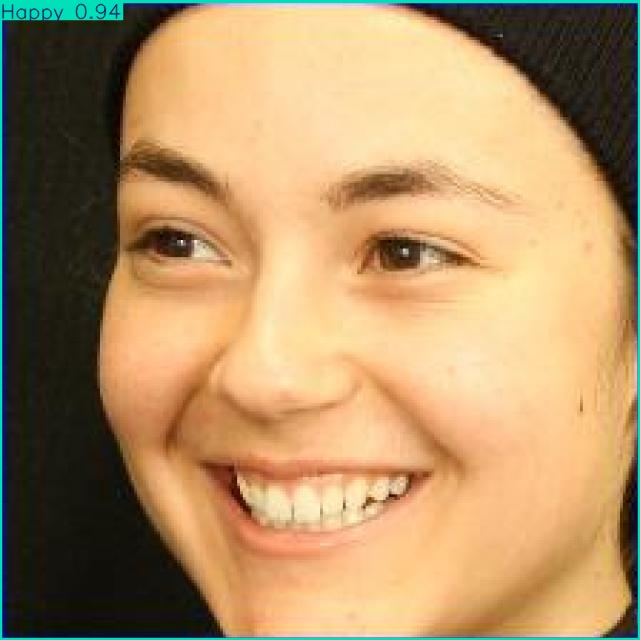

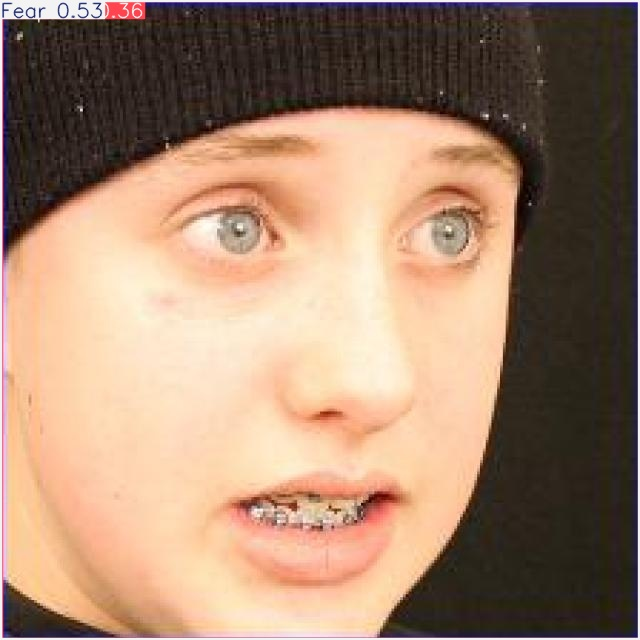

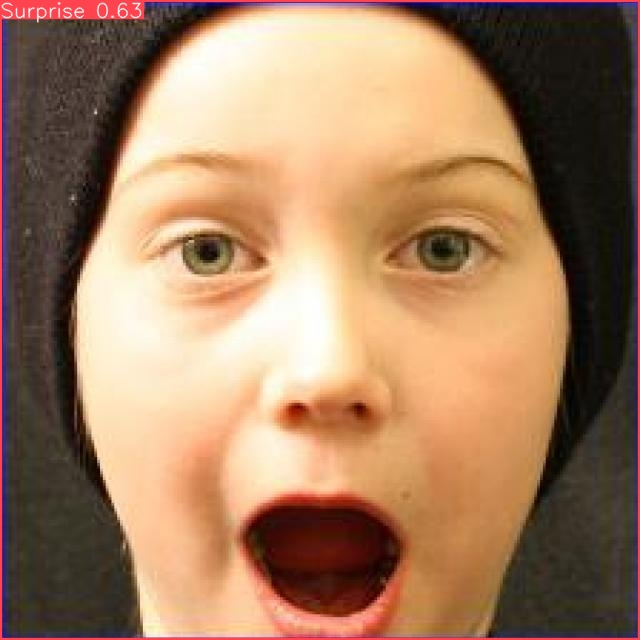

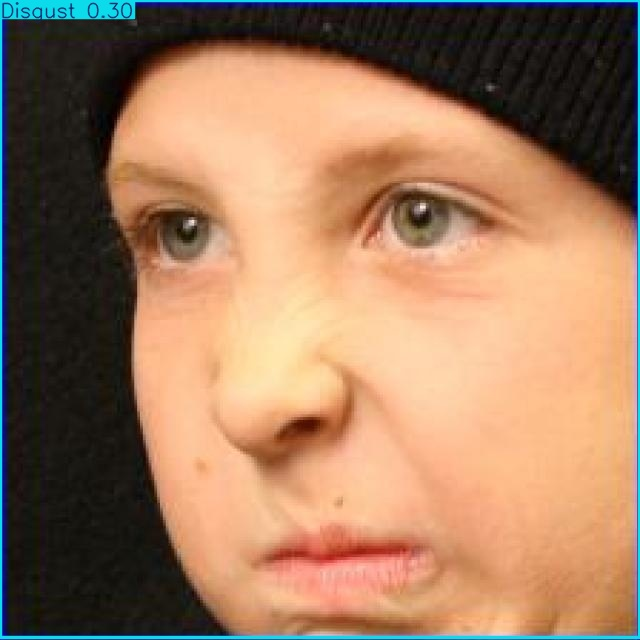

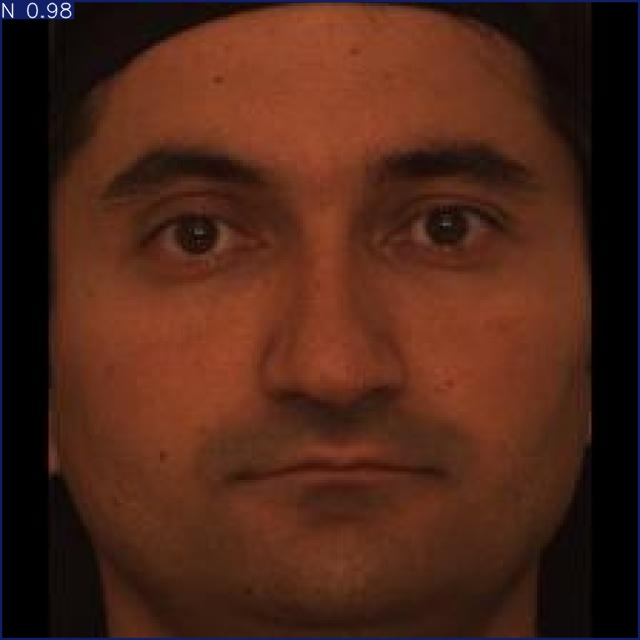

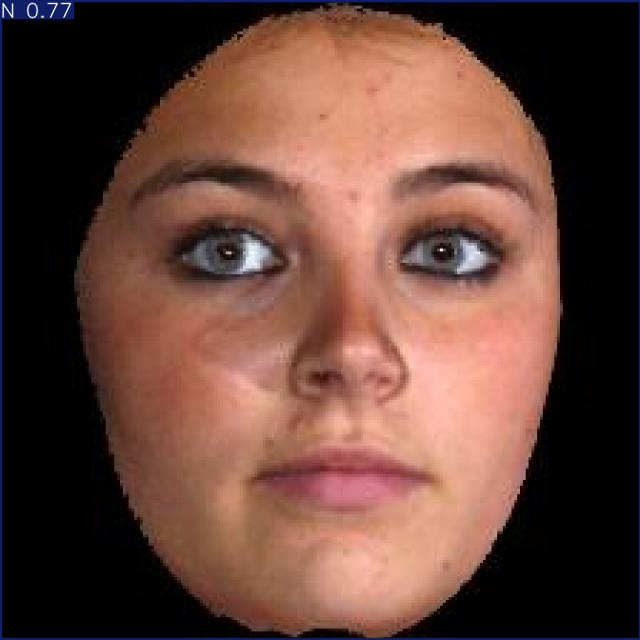

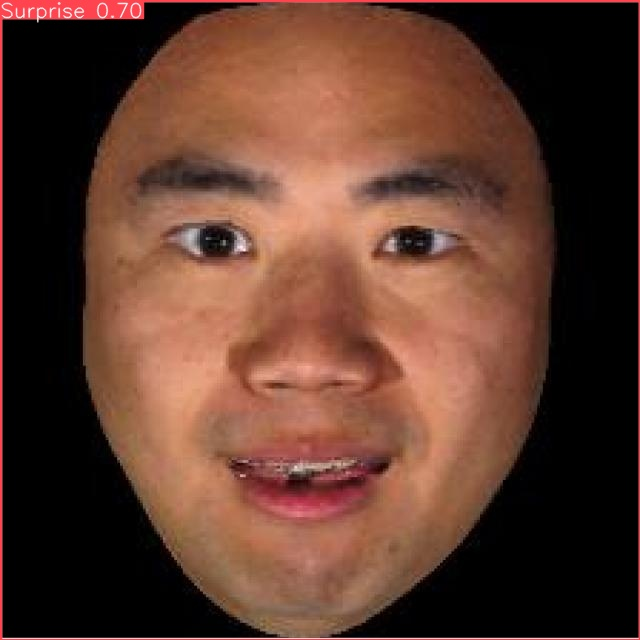

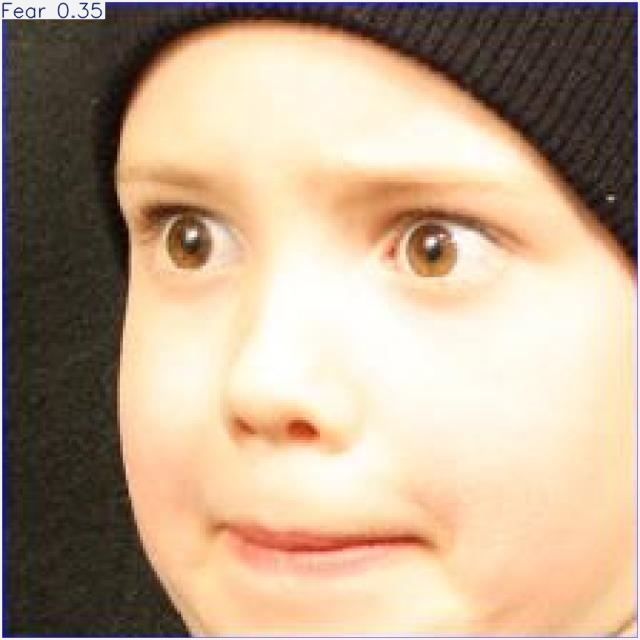

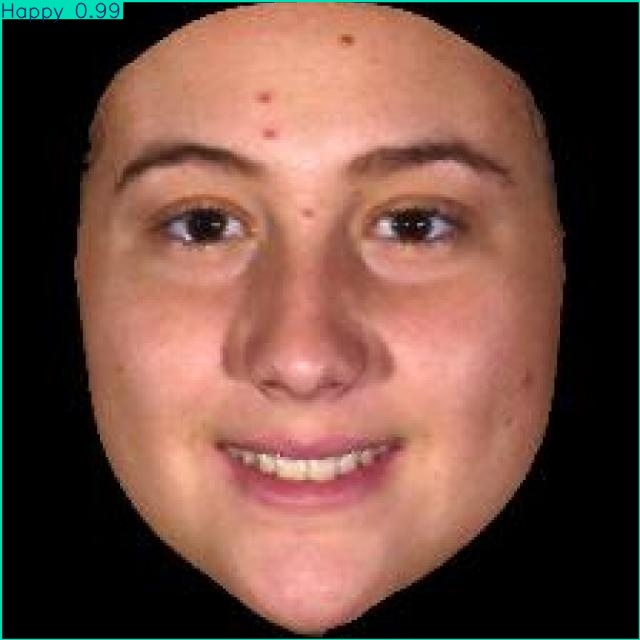

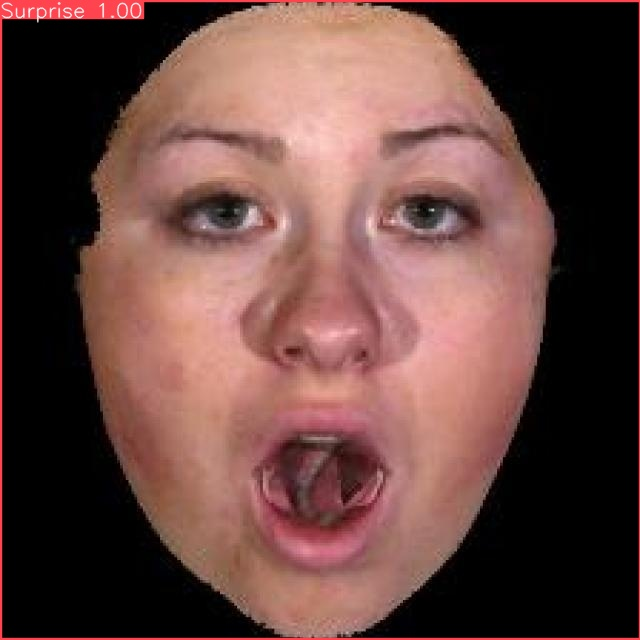

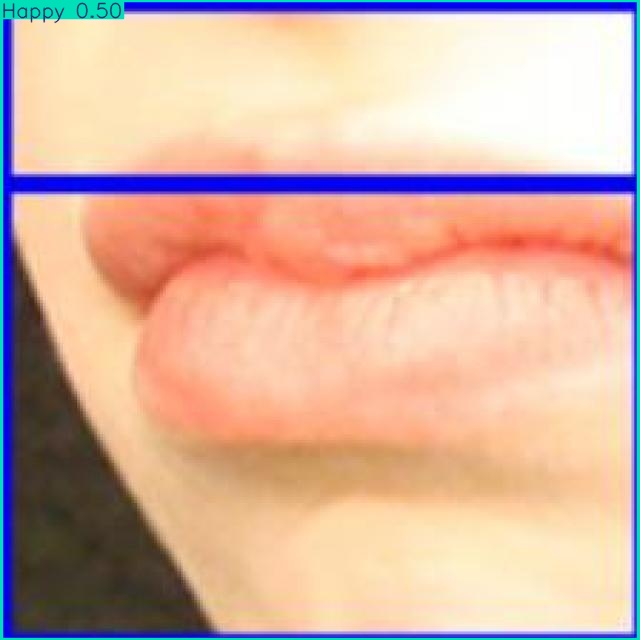

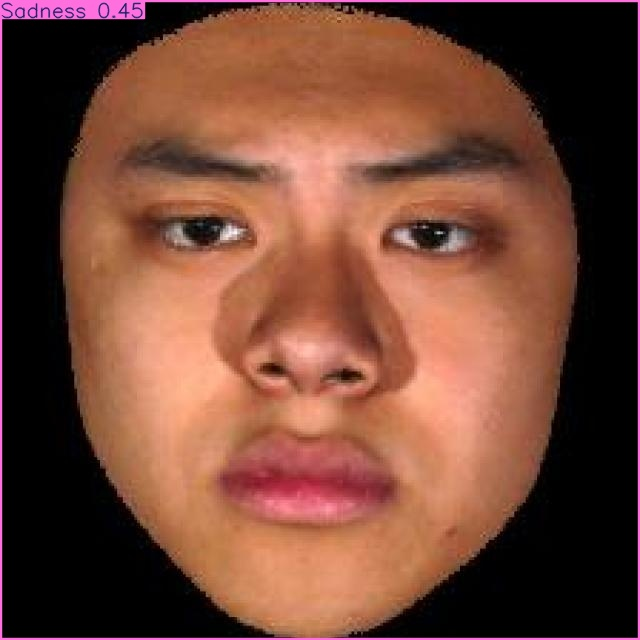

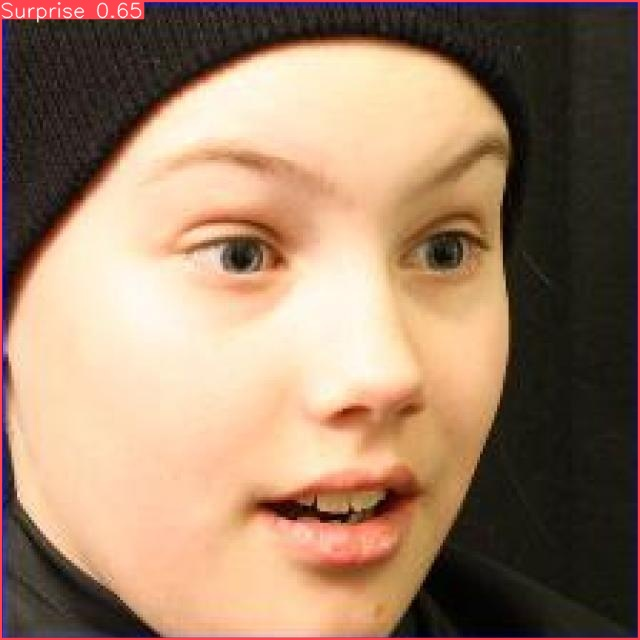

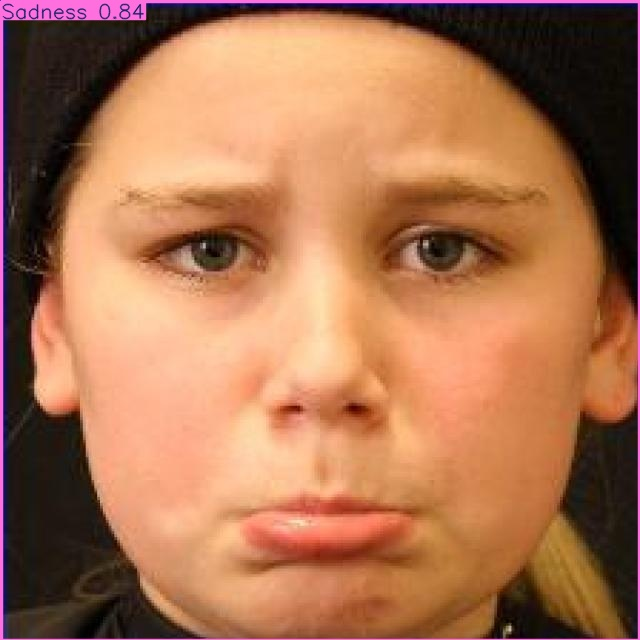

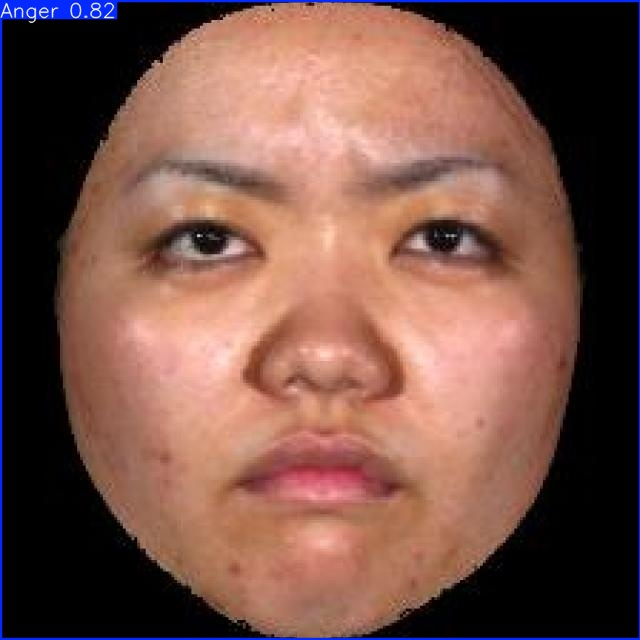

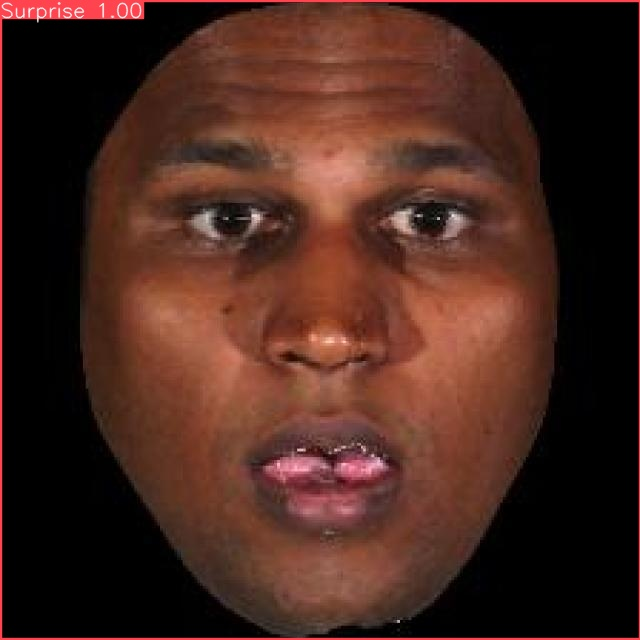

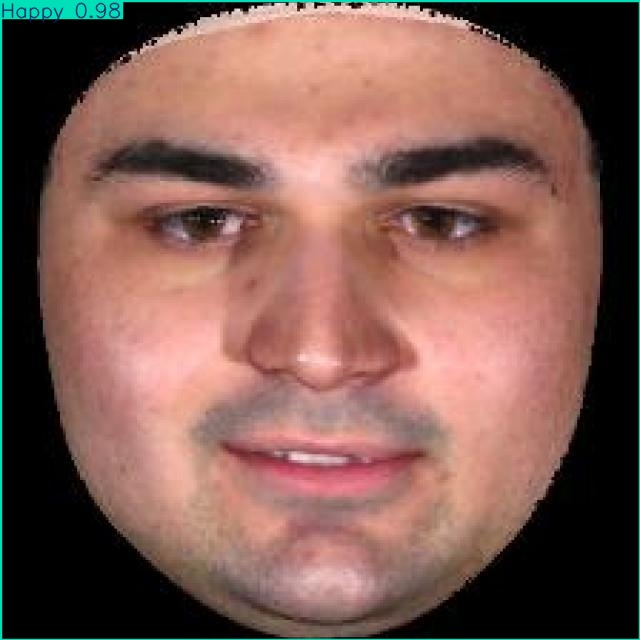

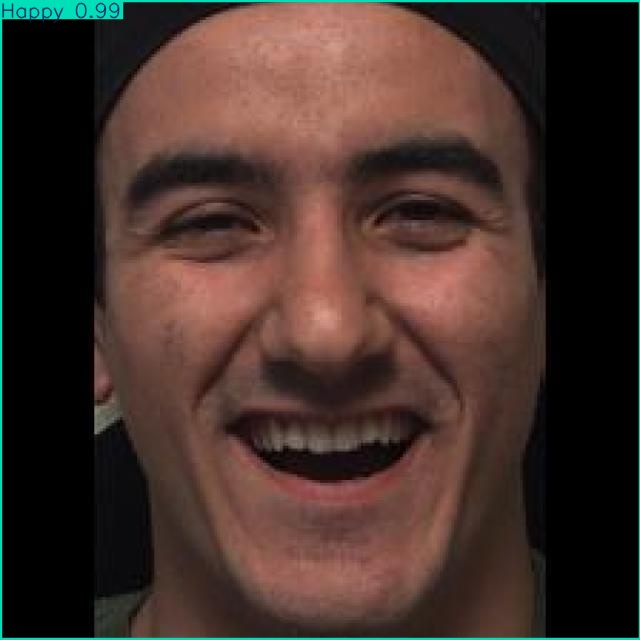

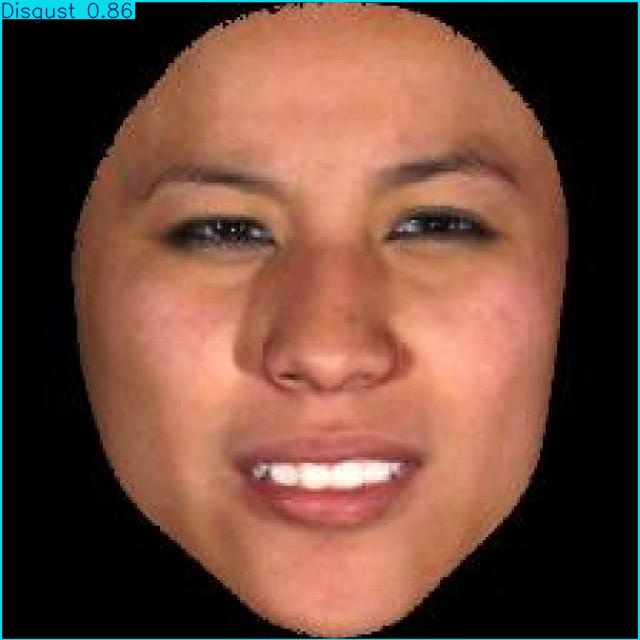

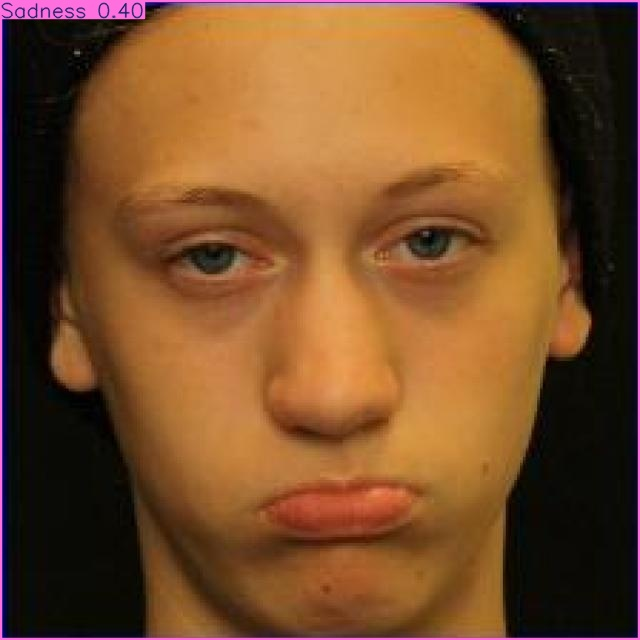

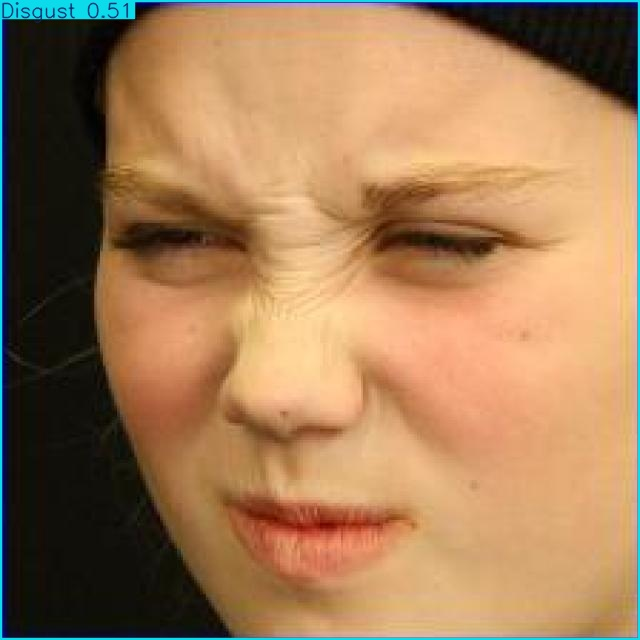

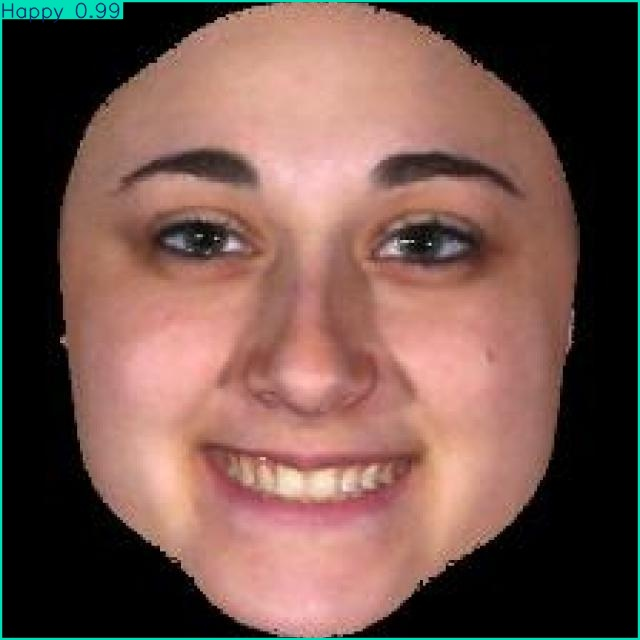

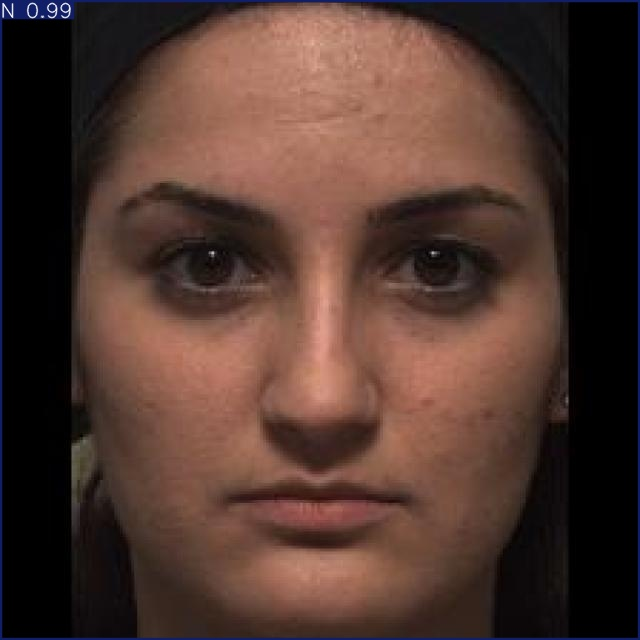

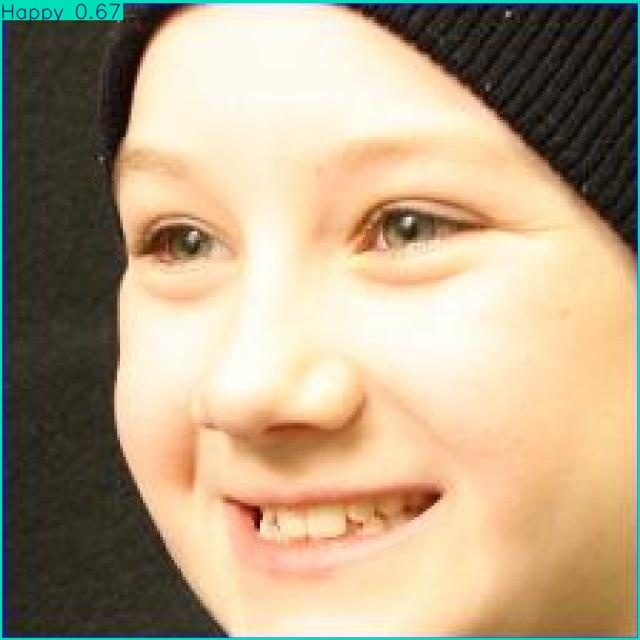

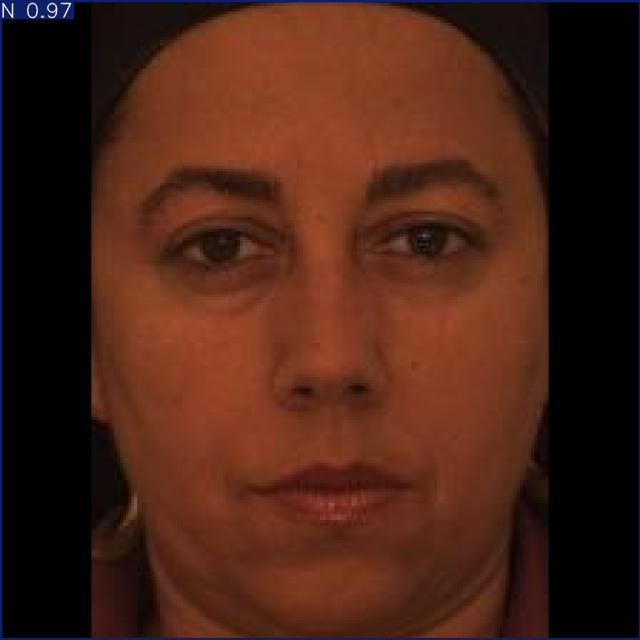

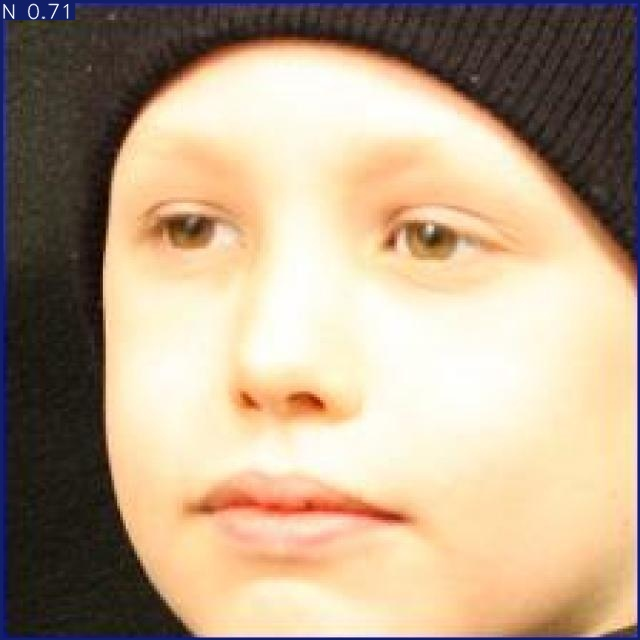

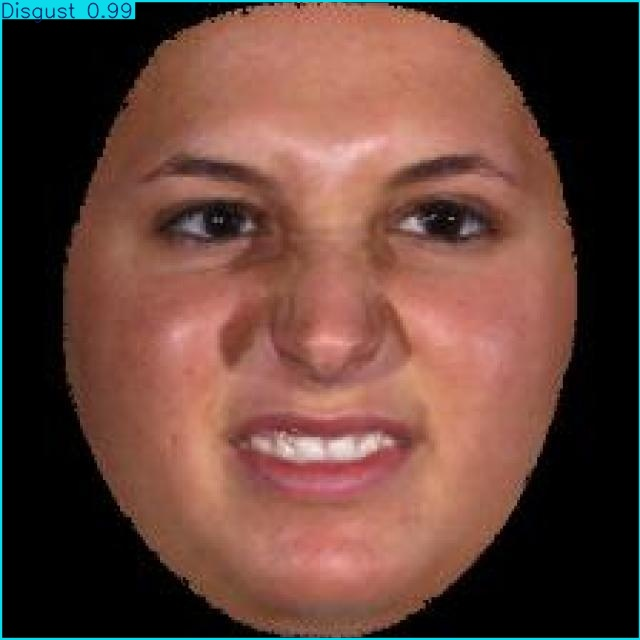

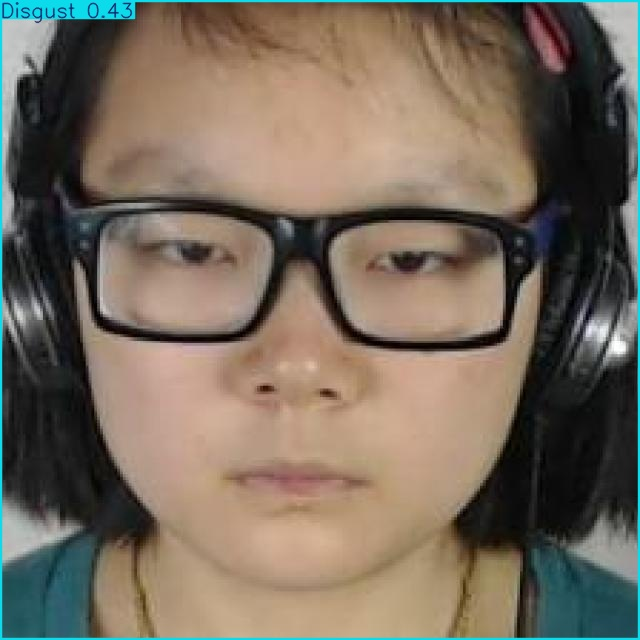

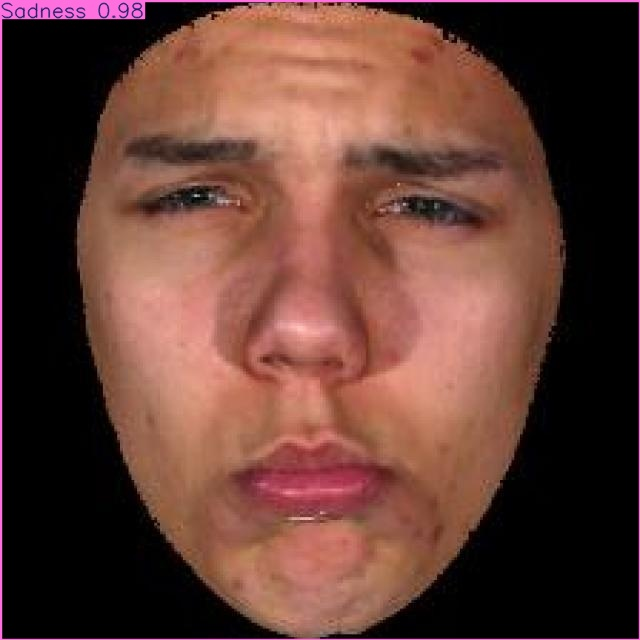

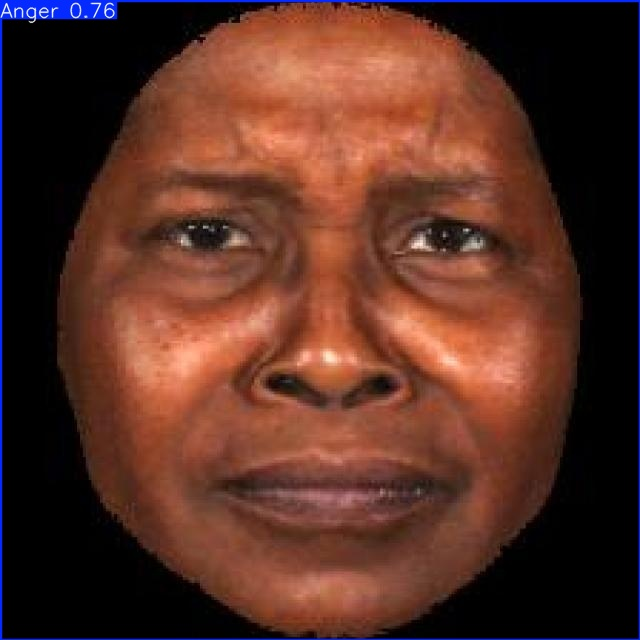

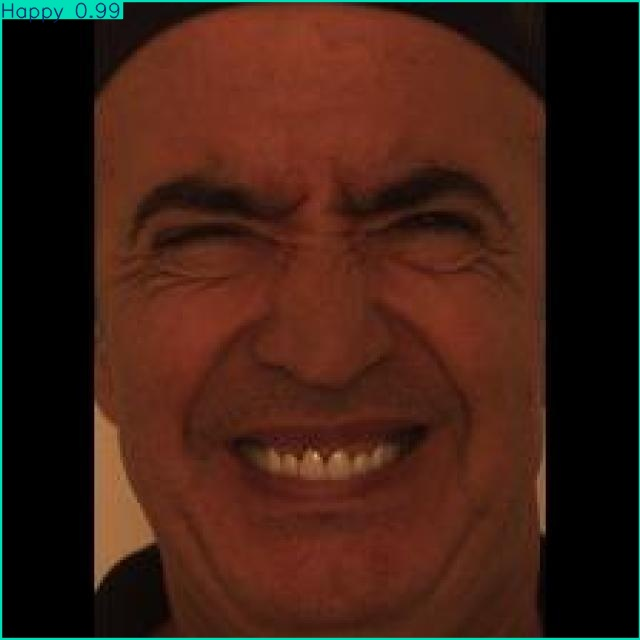

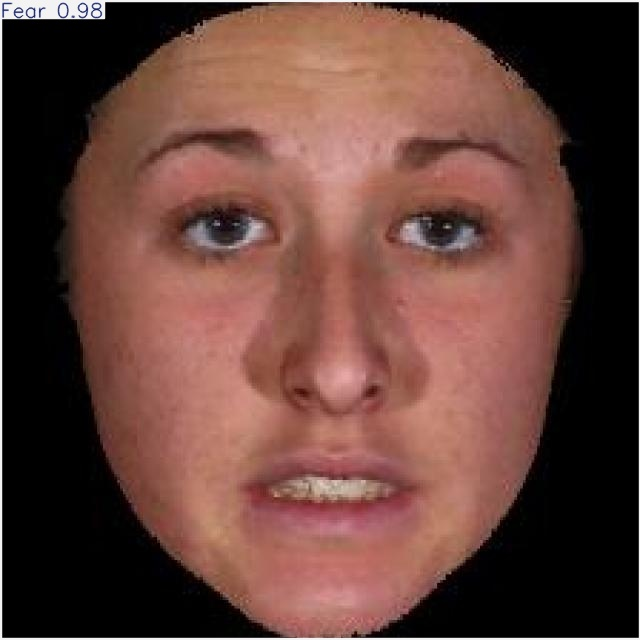

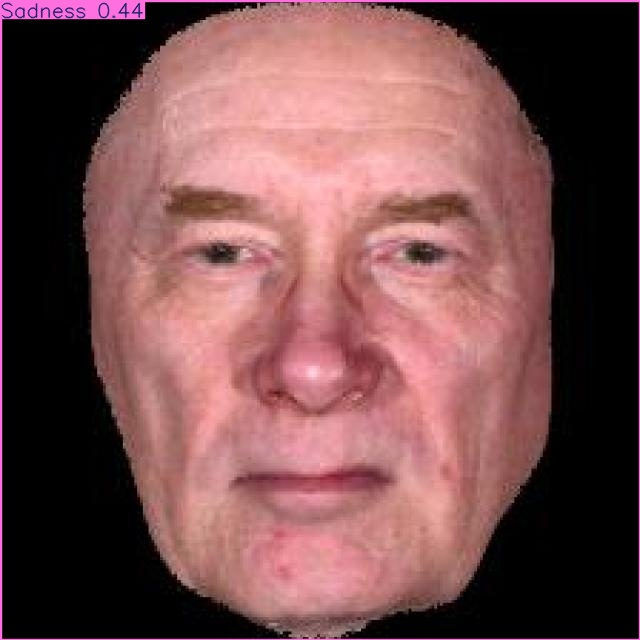

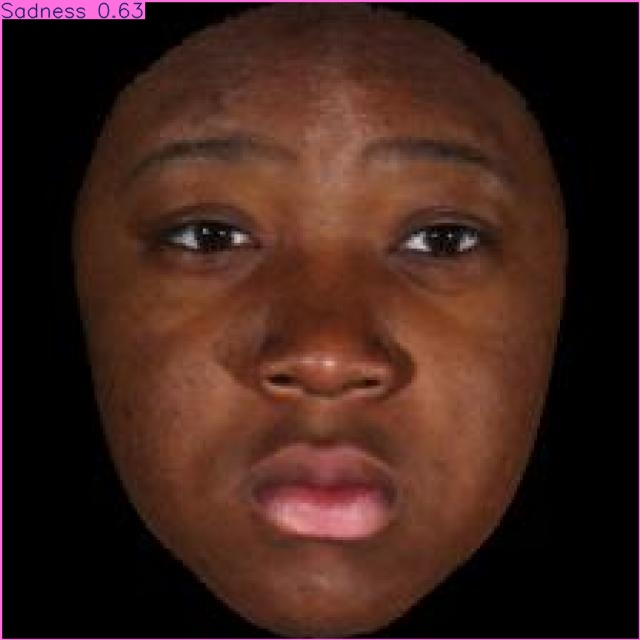

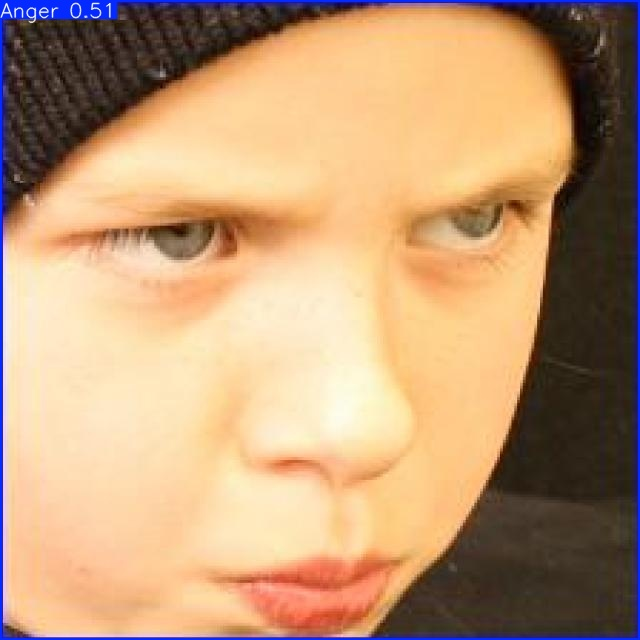

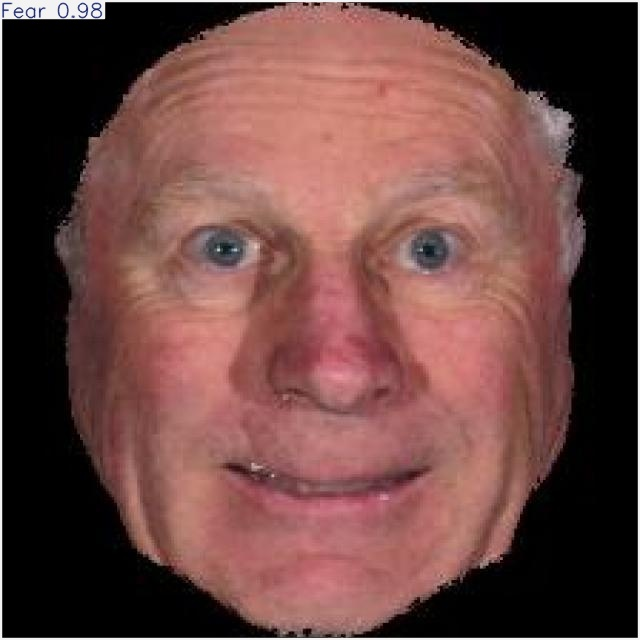

In [15]:
import glob
import os
from IPython.display import Image as IPyImage,display

latest=max(glob.iglob('/kaggle/working/runs/detect/predict*/'),key=os.path.getctime)
for img in glob.glob(f'{latest}/*jpg')[1:100]:
  display(IPyImage(filename=img,width=600))
  print('\n')

In [17]:
!yolo task=detect mode=val model='/kaggle/working/runs/detect/train/weights/best.pt' data=/kaggle/working/expression-1/data.yaml conf=0.25


Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 303 layers, 20,035,429 parameters, 0 gradients, 67.7 GFLOPs
val: Scanning /kaggle/working/expression-1/valid/labels.cache... 560 images, 0 b
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        560        560      0.718        0.7      0.754      0.754
                 Anger         90         90      0.726      0.611      0.728      0.728
               Disgust         81         81      0.797      0.605      0.762      0.762
                  Fear         74         74      0.638       0.73      0.667      0.667
                 Happy         94         94      0.783      0.777       0.82       0.82
                     N         75         75      0.658        0.8      0.784      0.784
               Sadness         70         70      0.688      0.629      0.706      0.706
              Surprise         76         76      0.73